In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly.express as px
import hdbscan

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_digits, make_blobs
from matplotlib.dates import MonthLocator, DateFormatter
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
# To tune a model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from utils import (
    col_out,
    model_summary,
    adj_r2_score,
    model_performance_regression,
    confusion_matrix_helper,
    model_performance_classification_sklearn,
)

import sklearn.metrics as metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    silhouette_score
)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config

import xgboost as xgb

set_config(display='diagram')
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
bigfive_data = pd.read_csv('bigfive_cleaned.csv', delimiter = ',')
bigfive_df = pd.DataFrame(data=bigfive_data)


In [3]:
bigfive_df.describe().T

count         mean           std  min    25%  \
EXT1                     570277.0     2.580108  1.237135e+00  1.0    1.0   
EXT2-                    570277.0     3.160664  1.303248e+00  1.0    2.0   
EXT3                     570277.0     3.236378  1.190181e+00  1.0    2.0   
EXT4-                    570277.0     2.784140  1.205325e+00  1.0    2.0   
EXT5                     570277.0     3.253906  1.245470e+00  1.0    2.0   
EXT6-                    570277.0     3.584535  1.209370e+00  1.0    3.0   
EXT7                     570277.0     2.718151  1.370464e+00  1.0    2.0   
EXT8-                    570277.0     2.526823  1.236456e+00  1.0    1.0   
EXT9                     570277.0     2.950547  1.322772e+00  1.0    2.0   
EXT10-                   570277.0     2.380634  1.263231e+00  1.0    1.0   
EST1-                    570277.0     2.684750  1.310262e+00  1.0    2.0   
EST2                     570277.0     3.171568  1.189754e+00  1.0    2.0   
EST3-                    570277.0     2.118826  1.122082e+00  1.0    1.0   
EST4                     570277.0     2.652827  1.225651e+00  1.0    2.0   
EST5-                    570277.0     3.152505  1.251715e+00  1.0    2.0   
EST6-                    570277.0     3.136079  1.291727e+00  1.0    2.0   
EST7-                    570277.0     2.941311  1.262340e+00  1.0    2.0   
EST8-                    570277.0     3.308480  1.318760e+00  1.0    2.0   
EST9-                    570277.0     2.898386  1.266431e+00  1.0    2.0   
EST10-                   570277.0     3.145529  1.306825e+00  1.0    2.0   
AGR1-                    570277.0     3.784649  1.297912e+00  1.0    3.0   
AGR2                     570277.0     3.862230  1.083301e+00  1.0    3.0   
AGR3-                    570277.0     3.729391  1.263936e+00  1.0    3.0   
AGR4                     570277.0     3.952420  1.078382e+00  1.0    3.0   
AGR5-                    570277.0     3.704580  1.153015e+00  1.0    3.0   
AGR6                     570277.0     3.758409  1.164916e+00  1.0    3.0   
AGR7-                    570277.0     3.773940  1.109230e+00  1.0    3.0   
AGR8                     570277.0     3.692762  1.044312e+00  1.0    3.0   
AGR9                     570277.0     3.791994  1.140594e+00  1.0    3.0   
AGR10                    570277.0     3.596379  1.034375e+00  1.0    3.0   
CSN1                     570277.0     3.322819  1.123864e+00  1.0    3.0   
CSN2-                    570277.0     2.999377  1.370342e+00  1.0    2.0   
CSN3                     570277.0     4.006823  9.948598e-01  1.0    4.0   
CSN4-                    570277.0     3.348399  1.233836e+00  1.0    2.0   
CSN5                     570277.0     2.578959  1.241722e+00  1.0    2.0   
CSN6-                    570277.0     3.142206  1.401532e+00  1.0    2.0   
CSN7                     570277.0     3.735108  1.068763e+00  1.0    3.0   
CSN8-                    570277.0     3.516128  1.125282e+00  1.0    3.0   
CSN9                     570277.0     3.168143  1.248253e+00  1.0    2.0   
CSN10                    570277.0     3.629880  9.965671e-01  1.0    3.0   
OPN1                     570277.0     3.781236  1.073814e+00  1.0    3.0   
OPN2-                    570277.0     3.981265  1.081173e+00  1.0    3.0   
OPN3                     570277.0     4.063269  1.027940e+00  1.0    3.0   
OPN4-                    570277.0     4.052492  1.055529e+00  1.0    3.0   
OPN5                     570277.0     3.833656  9.280583e-01  1.0    3.0   
OPN6-                    570277.0     4.119014  1.072627e+00  1.0    4.0   
OPN7                     570277.0     4.057877  9.184759e-01  1.0    4.0   
OPN8                     570277.0     3.292484  1.210247e+00  1.0    2.0   
OPN9                     570277.0     4.226416  9.362366e-01  1.0    4.0   
OPN10                    570277.0     3.998161  9.805384e-01  1.0    3.0   
screenw                  570277.0  1118.488580  5.834065e+02  0.0  375.0   
screenh                  570277.0   823.421074  1.856917e+02  0.0  667.0   


In [4]:
bigfive_df.head()

EXT1  EXT2-  EXT3  EXT4-  EXT5  EXT6-  EXT7  EXT8-  EXT9  EXT10-  EST1-  \
0   4.0    5.0   5.0    4.0   5.0    5.0   5.0    4.0   4.0     5.0    5.0   
1   3.0    1.0   3.0    2.0   3.0    3.0   2.0    1.0   1.0     1.0    4.0   
2   2.0    3.0   4.0    2.0   3.0    4.0   1.0    3.0   2.0     1.0    2.0   
3   2.0    4.0   2.0    3.0   4.0    4.0   2.0    2.0   1.0     2.0    3.0   
4   3.0    3.0   4.0    4.0   4.0    4.0   2.0    3.0   3.0     2.0    3.0   

   EST2  EST3-  EST4  EST5-  EST6-  EST7-  EST8-  EST9-  EST10-  AGR1-  AGR2  \
0   4.0    2.0   2.0    4.0    4.0    4.0    4.0    3.0     4.0    4.0   5.0   
1   3.0    2.0   1.0    3.0    5.0    4.0    5.0    3.0     5.0    5.0   4.0   
2   4.0    2.0   2.0    4.0    4.0    4.0    4.0    5.0     3.0    5.0   4.0   
3   3.0    3.0   2.0    3.0    4.0    4.0    4.0    2.0     3.0    4.0   4.0   
4   4.0    3.0   2.0    4.0    5.0    4.0    5.0    4.0     4.0    4.0   3.0   

   AGR3-  AGR4  AGR5-  AGR6  AGR7-  AGR8  AGR9  AGR10  CSN1  CSN2-  CSN3  \
0    4.0   4.0    4.0   3.0    4.0   4.0   3.0    4.0   3.0    2.0   3.0   
1    5.0   5.0    5.0   5.0    3.0   4.0   5.0    3.0   3.0    4.0   5.0   
2    5.0   4.0    4.0   4.0    5.0   4.0   4.0    3.0   4.0    4.0   2.0   
3    3.0   4.0    4.0   4.0    4.0   4.0   3.0    4.0   2.0    2.0   4.0   
4    5.0   4.0    4.0   3.0    4.0   3.0   4.0    4.0   3.0    4.0   4.0   

   CSN4-  CSN5  CSN6-  CSN7  CSN8-  CSN9  CSN10  OPN1  OPN2-  OPN3  OPN4-  \
0    4.0   2.0    2.0   4.0    4.0   4.0    4.0   5.0    5.0   4.0    5.0   
1    3.0   3.0    5.0   3.0    3.0   5.0    3.0   1.0    4.0   4.0    4.0   
2    4.0   3.0    3.0   4.0    4.0   4.0    2.0   5.0    5.0   2.0    5.0   
3    2.0   1.0    4.0   2.0    3.0   1.0    4.0   4.0    4.0   5.0    4.0   
4    5.0   3.0    4.0   4.0    3.0   4.0    3.0   5.0    5.0   5.0    5.0   

   OPN5  OPN6-  OPN7  OPN8  OPN9  OPN10             dateload  screenw  \
0   4.0    5.0   5.0   3.0   4.0    5.0  2016-03-03 02:01:01    768.0   
1   3.0    5.0   4.0   2.0   5.0    3.0  2016-03-03 02:01:20   1360.0   
2   4.0    4.0   5.0   3.0   4.0    4.0  2016-03-03 02:01:56   1366.0   
3   3.0    5.0   4.0   4.0   3.0    3.0  2016-03-03 02:02:02   1920.0   
4   3.0    5.0   5.0   4.0   5.0    2.0  2016-03-03 02:03:12   1600.0   

   screenh  introelapse  testelapse  endelapse country  Extroversion Score  \
0   1024.0          9.0       234.0          6     GBR                36.0   
1    768.0         12.0       179.0         11     MYS                10.0   
2    768.0          3.0       186.0          7     GBR                15.0   
3   1200.0        186.0       219.0          7     GBR                16.0   
4   1000.0          4.0       196.0          3     SWE                22.0   

   Agreeableness Score  Conscientiousness Score  Neuroticism Score  \
0                 29.0                     22.0               26.0   
1                 34.0                     27.0               25.0   
2                 32.0                     24.0               24.0   
3                 28.0                     15.0               21.0   
4                 28.0                     27.0               28.0   

   Openness Score  
0            35.0  
1            25.0  
2            31.0  
3            29.0  
4            34.0

In [77]:
participants_bycountry = bigfive_df['country'].value_counts().reset_index()
participants_bycountry.columns = ['country', 'Participants']
participants_dict = participants_bycountry.set_index('country')['Participants'].to_dict()

In [82]:
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap = worldmap[worldmap['continent'] != 'Antarctica']

merged = worldmap.merge(participants_bycountry, how='left', left_on='iso_a3', right_on='country')

# Plot the chloropleth map
fig = px.choropleth(merged, 
                    geojson=merged.geometry, 
                    locations=worldmap.index, 
                    color='Participants',
                    color_continuous_scale=px.colors.sequential.YlGn,
                    hover_name='name',
                    title='Count of Participants by Country')
fig.update_geos(showcountries=True, countrycolor='Black', lataxis_range=[-59,90])
fig.show()

In [90]:
worldmap

pop_est                continent                      name iso_a3  \
0    8.899530e+05                  Oceania                      Fiji    FJI   
1    5.800546e+07                   Africa                  Tanzania    TZA   
2    6.032530e+05                   Africa                 W. Sahara    ESH   
3    3.758926e+07            North America                    Canada    CAN   
4    3.282395e+08            North America  United States of America    USA   
5    1.851393e+07                     Asia                Kazakhstan    KAZ   
6    3.358065e+07                     Asia                Uzbekistan    UZB   
7    8.776109e+06                  Oceania          Papua New Guinea    PNG   
8    2.706256e+08                     Asia                 Indonesia    IDN   
9    4.493871e+07            South America                 Argentina    ARG   
10   1.895204e+07            South America                     Chile    CHL   
11   8.679057e+07                   Africa           Dem. Rep. Congo    COD   
12   1.019232e+07                   Africa                   Somalia    SOM   
13   5.257397e+07                   Africa                     Kenya    KEN   
14   4.281324e+07                   Africa                     Sudan    SDN   
15   1.594688e+07                   Africa                      Chad    TCD   
16   1.126308e+07            North America                     Haiti    HTI   
17   1.073896e+07            North America            Dominican Rep.    DOM   
18   1.443735e+08                   Europe                    Russia    RUS   
19   3.894820e+05            North America                   Bahamas    BHS   
20   3.398000e+03            South America              Falkland Is.    FLK   
21   5.347896e+06                   Europe                    Norway    NOR   
22   5.622500e+04            North America                 Greenland    GRL   
23   1.400000e+02  Seven seas (open ocean)    Fr. S. Antarctic Lands    ATF   
24   1.293119e+06                     Asia               Timor-Leste    TLS   
25   5.855827e+07                   Africa              South Africa    ZAF   
26   2.125268e+06                   Africa                   Lesotho    LSO   
27   1.275755e+08            North America                    Mexico    MEX   
28   3.461734e+06            South America                   Uruguay    URY   
29   2.110495e+08            South America                    Brazil    BRA   
30   1.151310e+07            South America                   Bolivia    BOL   
31   3.251045e+07            South America                      Peru    PER   
32   5.033944e+07            South America                  Colombia    COL   
33   4.246439e+06            North America                    Panama    PAN   
34   5.047561e+06            North America                Costa Rica    CRI   
35   6.545502e+06            North America                 Nicaragua    NIC   
36   9.746117e+06            North America                  Honduras    HND   
37   6.453553e+06            North America               El Salvador    SLV   
38   1.660403e+07            North America                 Guatemala    GTM   
39   3.903530e+05            North America                    Belize    BLZ   
40   2.851583e+07            South America                 Venezuela    VEN   
41   7.827660e+05            South America                    Guyana    GUY   
42   5.813630e+05            South America                  Suriname    SUR   
43   6.705989e+07                   Europe                    France    FRA   
44   1.737366e+07            South America                   Ecuador    ECU   
45   3.193694e+06            North America               Puerto Rico    PRI   
46   2.948279e+06            North America                   Jamaica    JAM   
47   1.133348e+07            North America                      Cuba    CUB   
48   1.464547e+07                   Africa                  Zimbabwe    ZWE   
49   2.303697e+06                   Africa                  

In [93]:
country_names = worldmap[['name', 'iso_a3']]
country_names_dict = country_names.set_index('iso_a3')['name'].to_dict()
country_names_dict['HKG'] = 'Hong Kong'
country_names_dict['SGP'] = 'Singapore'

In [87]:
country_names_dict

{'FJI': 'Fiji',
 'TZA': 'Tanzania',
 'ESH': 'W. Sahara',
 'CAN': 'Canada',
 'USA': 'United States of America',
 'KAZ': 'Kazakhstan',
 'UZB': 'Uzbekistan',
 'PNG': 'Papua New Guinea',
 'IDN': 'Indonesia',
 'ARG': 'Argentina',
 'CHL': 'Chile',
 'COD': 'Dem. Rep. Congo',
 'SOM': 'Somalia',
 'KEN': 'Kenya',
 'SDN': 'Sudan',
 'TCD': 'Chad',
 'HTI': 'Haiti',
 'DOM': 'Dominican Rep.',
 'RUS': 'Russia',
 'BHS': 'Bahamas',
 'FLK': 'Falkland Is.',
 'NOR': 'Norway',
 'GRL': 'Greenland',
 'ATF': 'Fr. S. Antarctic Lands',
 'TLS': 'Timor-Leste',
 'ZAF': 'South Africa',
 'LSO': 'Lesotho',
 'MEX': 'Mexico',
 'URY': 'Uruguay',
 'BRA': 'Brazil',
 'BOL': 'Bolivia',
 'PER': 'Peru',
 'COL': 'Colombia',
 'PAN': 'Panama',
 'CRI': 'Costa Rica',
 'NIC': 'Nicaragua',
 'HND': 'Honduras',
 'SLV': 'El Salvador',
 'GTM': 'Guatemala',
 'BLZ': 'Belize',
 'VEN': 'Venezuela',
 'GUY': 'Guyana',
 'SUR': 'Suriname',
 'FRA': 'France',
 'ECU': 'Ecuador',
 'PRI': 'Puerto Rico',
 'JAM': 'Jamaica',
 'CUB': 'Cuba',
 'ZWE': 'Zim

In [72]:
participants_bycountry.head()

country  Participants
0      USA        300493
1      GBR         43411
2      CAN         38337
3      AUS         30302
4      DEU         10895
5      IND          9847
6      PHL          9470
7      MEX          8275
8      NOR          7137
9      NLD          6910
10     SWE          6526
11     MYS          6330
12     NZL          5752
13     IDN          4928
14     SGP          4794
15     BRA          4767
16     FRA          4497
17     ITA          3813
18     ESP          3719
19     POL          3621
20     IRL          3501
21     FIN          3410
22     DNK          3345
23     ROU          2908
24     COL          2721
25     RUS          2536
26     BEL          2474
27     ARG          2430
28     HKG          2421
29     ZAF          2399
30     TUR          2063
31     PAK          1995
32     PRT          1948
33     GRC          1931
34     CHE          1842
35     ARE          1722
36     AUT          1717
37     CHL          1707
38     HRV          1643
39     VNM          1471
40     SRB          1431
41     JPN          1417
42     CZE          1363
43     THA          1362
44     PER          1295
45     HUN          1169
46     KOR          1156
47     ISR          1076

In [7]:
#Numerical columns
num_cols = bigfive_df.select_dtypes(include=[np.number])

#Categorical columns
cat_cols = bigfive_df.select_dtypes(exclude=[np.number])

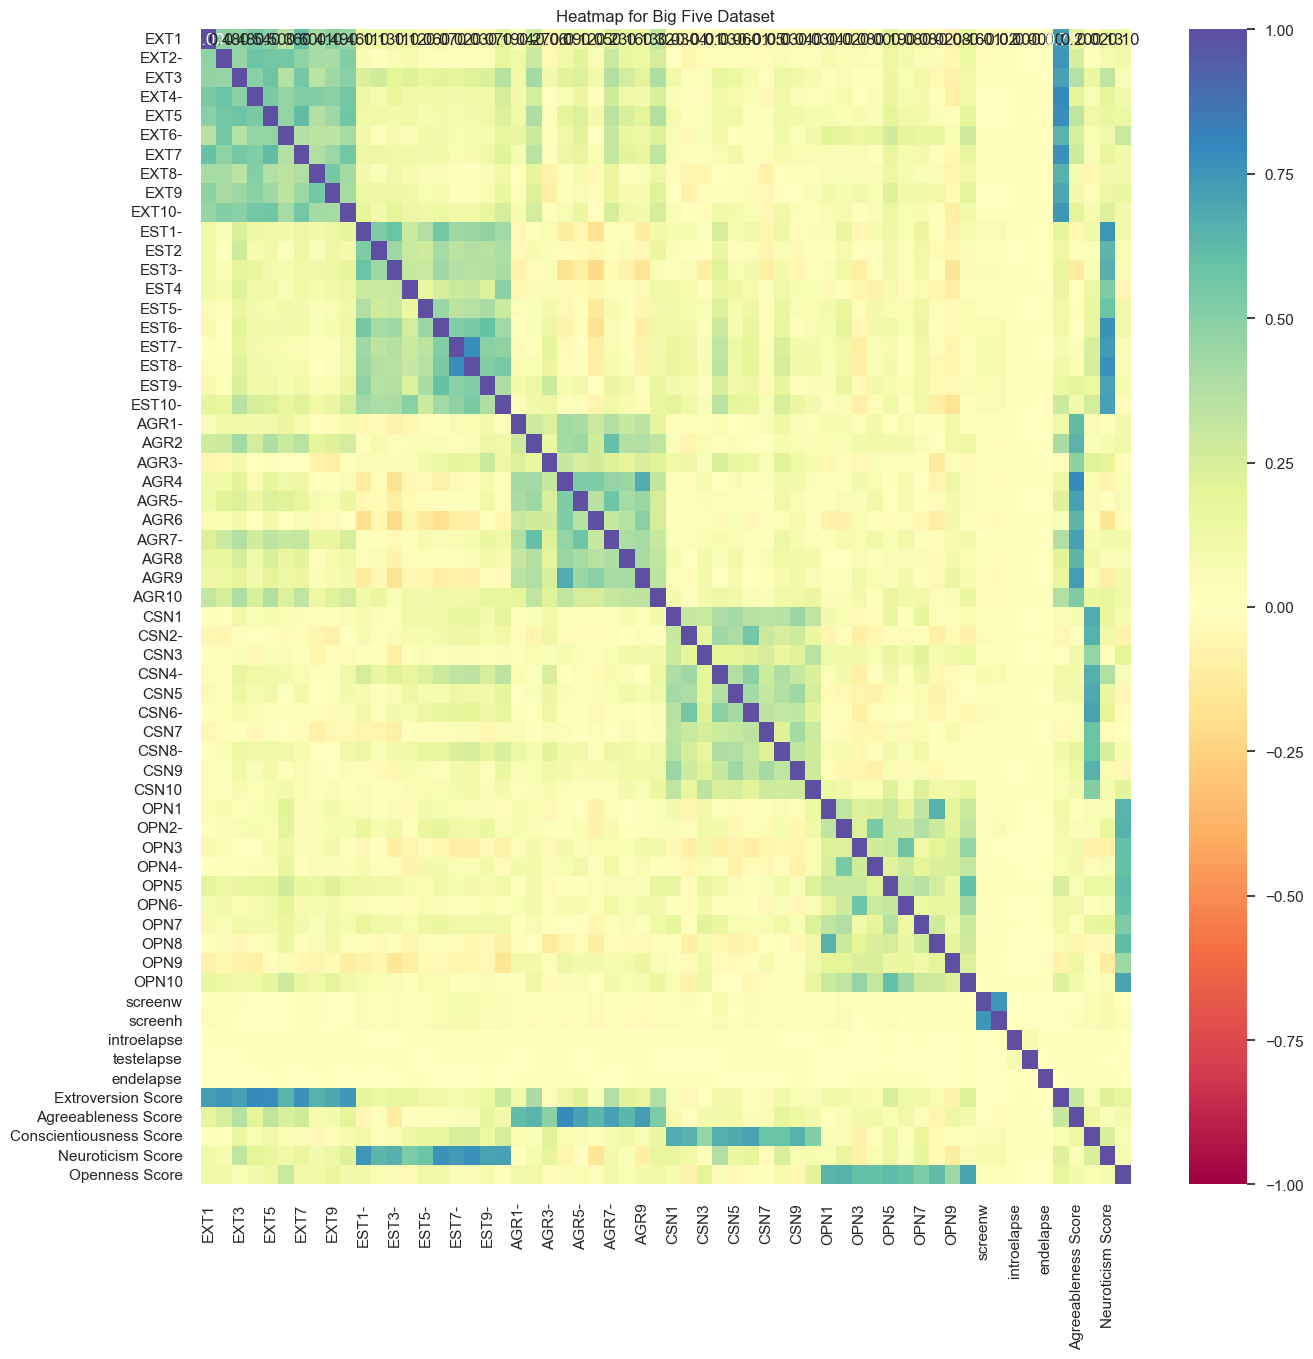

In [8]:
#Explore Numerical Variables

#Correlation Table for Numerical Variables
corr_table = num_cols.corr()
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.0)
sns.heatmap(corr_table, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Heatmap for Big Five Dataset")
plt.show()

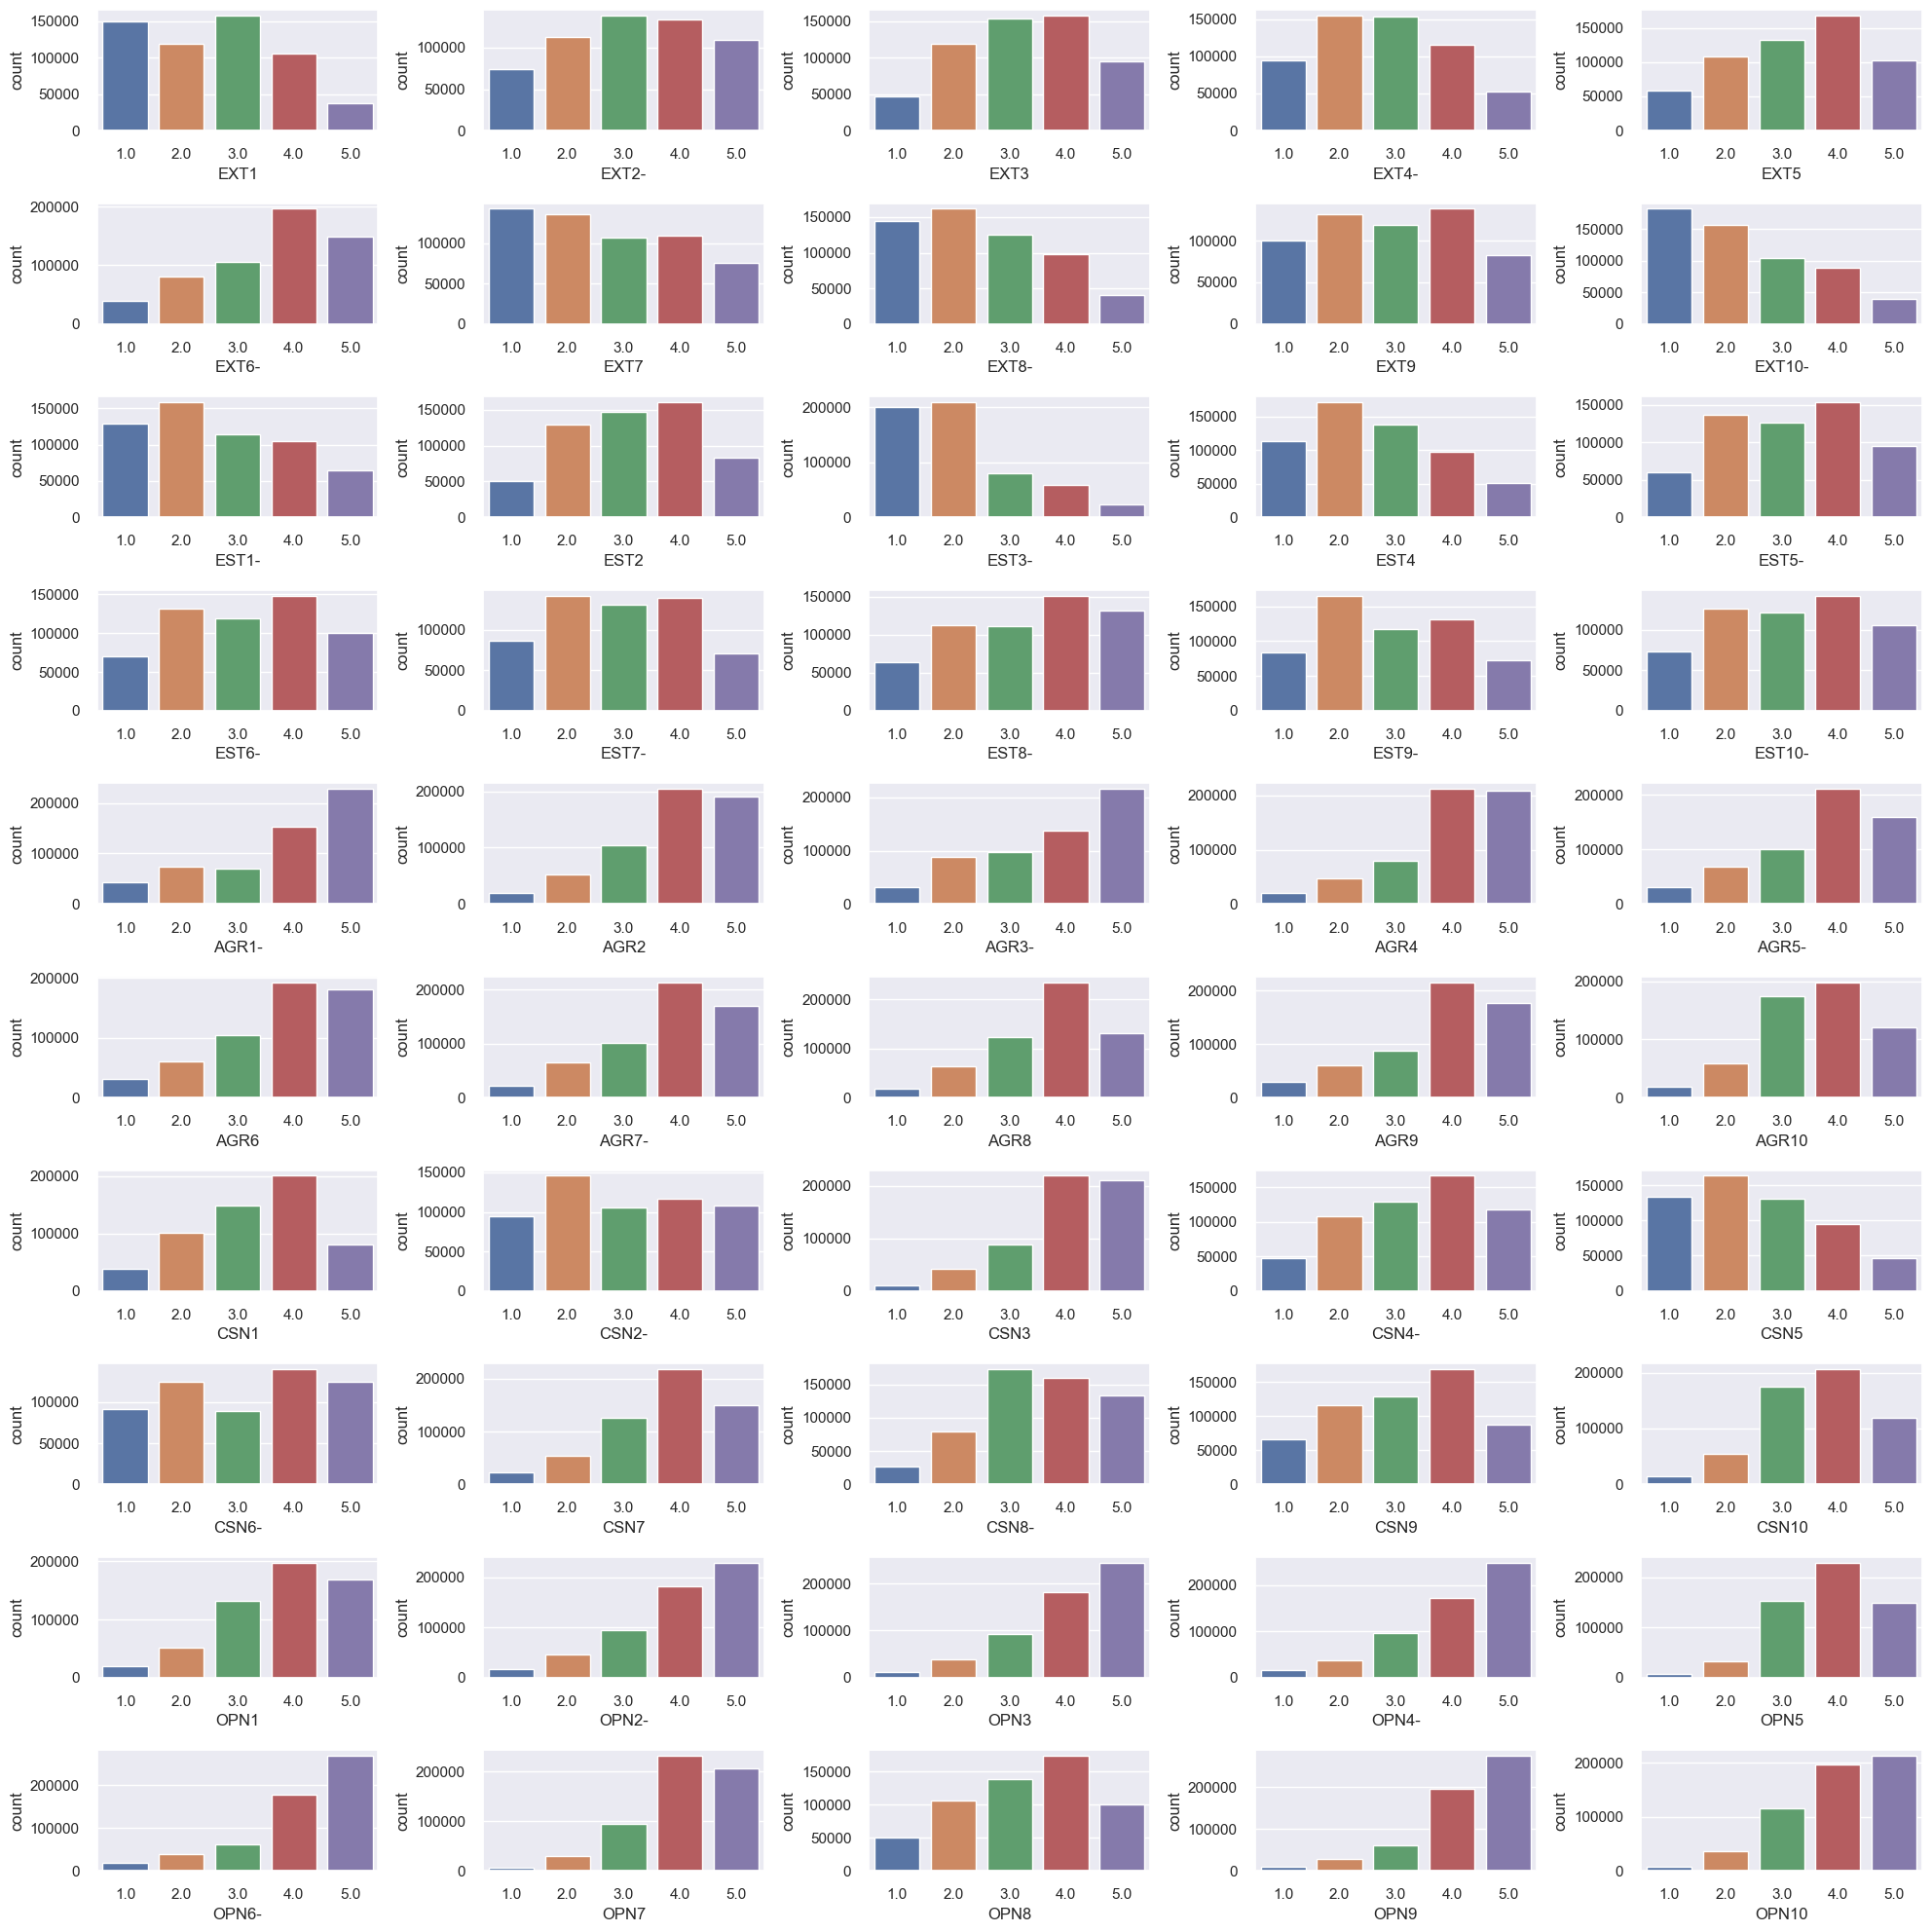

In [9]:

#Counting up responses
fig, axes = plt.subplots(10,5, figsize=(20,20))
axes = axes.flatten()
for i, col in enumerate (num_cols.columns[:50]):
        sns.countplot(x=col, data=num_cols, ax=axes[i])
plt.tight_layout()
plt.show()


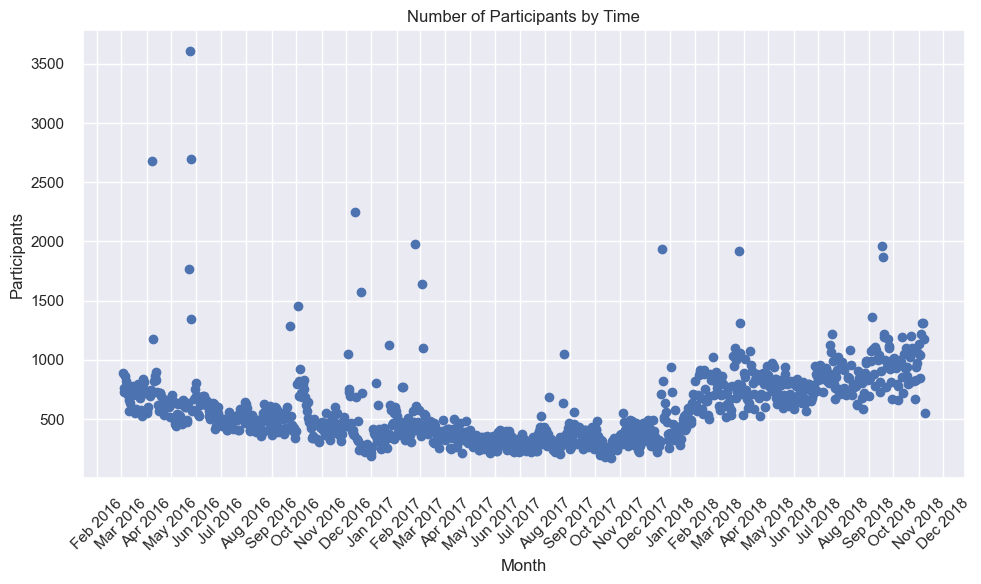

In [10]:
#Explore Time
bigfive_time = pd.DataFrame({'timestamp': pd.to_datetime(bigfive_df['dateload'])})
time_series = bigfive_time.groupby(bigfive_time['timestamp'].dt.date).size()

plt.figure(figsize=(10, 6))
plt.scatter(time_series.index, time_series.values)
plt.xlabel('Month')
plt.ylabel('Participants')
plt.title('Number of Participants by Time')

ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
p_scores = bigfive_df.loc[:,['Extroversion Score','Agreeableness Score','Conscientiousness Score',
                               'Neuroticism Score','Openness Score']]
p_scores_columns = ['Extroversion Score','Agreeableness Score','Conscientiousness Score',
                               'Neuroticism Score','Openness Score']

answer_columns = ['EXT1','EXT2-','EXT3','EXT4-','EXT5','EXT6-','EXT7','EXT8-','EXT9','EXT10-',
                'EST1-','EST2','EST3-','EST4','EST5-','EST6-','EST7-','EST8-','EST9-','EST10-',
                'AGR1-','AGR2','AGR3-','AGR4','AGR5-','AGR6','AGR7-','AGR8','AGR9','AGR10',
                'CSN1','CSN2-','CSN3','CSN4-','CSN5','CSN6-','CSN7','CSN8-','CSN9','CSN10',
                'OPN1','OPN2-','OPN3','OPN4-','OPN5','OPN6-','OPN7','OPN8','OPN9','OPN10']

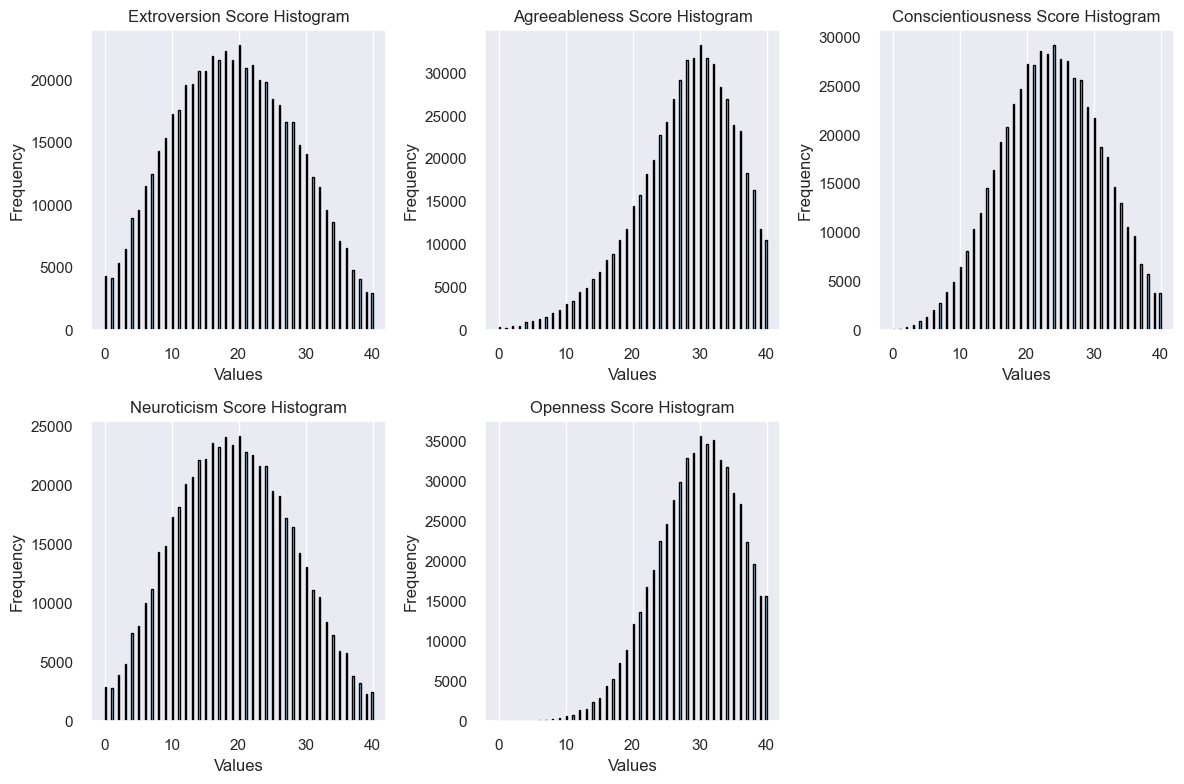

CPU times: total: 3.28 s
Wall time: 3.28 s


In [12]:
%%time
plt.figure(figsize=(12, 8))

for i, col in enumerate(p_scores.columns):
    plt.subplot(2, 3, i+1)
    plt.hist(p_scores[col], bins=int((max(p_scores[col] - min(p_scores[col]))/.2)),
                                     color = 'skyblue', edgecolor='black')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(col + ' Histogram')
    plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [98]:
#K-means Clustering Functions
def run_k_means(data, clusters, n_init, random_state):
    elbow = []
    sil_score = []

    # perform k-means clustering for different values of k
    for k in clusters:
        model = KMeans(n_clusters=k, n_init=n_init, random_state = random_state).fit(data)
        prediction = model.predict(data)

        # within cluster sum of squared distances between each member of the cluster and its centroid
        wcss = model.inertia_
        elbow.append(wcss)

        # Silhouette score
        score = silhouette_score(data, prediction)
        sil_score.append(score)
        print("For n_clusters = {}, WCSS: = {}, Silhouette score: {})".format(k, wcss, score))

    plt.plot(clusters, elbow, "bx-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("Selecting k with the Elbow Method")
    plt.show()

    plt.plot(clusters, sil_score)
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.title("Selecting k with Silhouette score")
    plt.show()

In [99]:
# function to plot silhouette scores
def plot_silhouette(data, optimal_k, n_init, random_state):
    # run k-mean for the optimal value of k
    kmeans = KMeans(n_clusters=optimal_k, n_init=n_init, random_state=random_state)

    # visualizing the silhouette score
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(data)
    visualizer.show()


In [100]:
#K-means Clustering Functions
def run_minibatch_k_means(data, clusters, n_init, batchsize, random_state):
    elbow = []
    sil_score = []

    # perform k-means clustering for different values of k
    for k in clusters:
        model = MiniBatchKMeans(n_clusters=k, n_init=n_init, 
                                batch_size=batchsize, random_state = random_state).fit(data)
        prediction = model.predict(data)

        # within cluster sum of squared distances between each member of the cluster and its centroid
        wcss = model.inertia_
        elbow.append(wcss)

        # Silhouette score
        score = silhouette_score(data, prediction)
        sil_score.append(score)
        print("For n_clusters = {}, WCSS: = {}, Silhouette score: {})".format(k, wcss, score))

    plt.plot(clusters, elbow, "bx-")
    plt.xlabel("k")
    plt.ylabel("WCSS")
    plt.title("Selecting k with the Elbow Method")
    plt.show()

    plt.plot(clusters, sil_score)
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.title("Selecting k with Silhouette score")
    plt.show()

In [101]:
pscores = bigfive_df[p_scores_columns].copy()
answers = bigfive_df[answer_columns].copy()

#sample size to determine best number of clusters optimal_k
answers_sample = answers.sample(n=10000)
pscores_sample = pscores.sample(n=10000)


For n_clusters = 2, WCSS: = 2352487.5571859763, Silhouette score: 0.20739384614583806)
For n_clusters = 3, WCSS: = 2062720.558781524, Silhouette score: 0.17694387973602047)
For n_clusters = 4, WCSS: = 1859196.4952974226, Silhouette score: 0.15782912990034248)
For n_clusters = 5, WCSS: = 1727575.186062064, Silhouette score: 0.14903479970375694)
For n_clusters = 6, WCSS: = 1653303.2560821138, Silhouette score: 0.13411260343286394)
For n_clusters = 7, WCSS: = 1549636.5718623253, Silhouette score: 0.14413043003815723)
For n_clusters = 8, WCSS: = 1475129.8152531243, Silhouette score: 0.14174980794378414)
For n_clusters = 9, WCSS: = 1408604.011920987, Silhouette score: 0.14104300196626676)
For n_clusters = 10, WCSS: = 1350658.7737770998, Silhouette score: 0.14163727239786222)
For n_clusters = 11, WCSS: = 1317187.109929727, Silhouette score: 0.13636626923183723)
For n_clusters = 12, WCSS: = 1270095.1549621432, Silhouette score: 0.13540617655395104)
For n_clusters = 13, WCSS: = 1245204.5954867

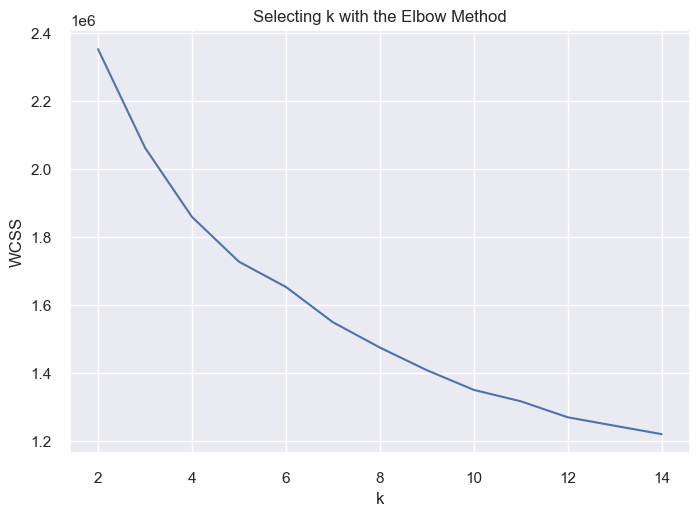

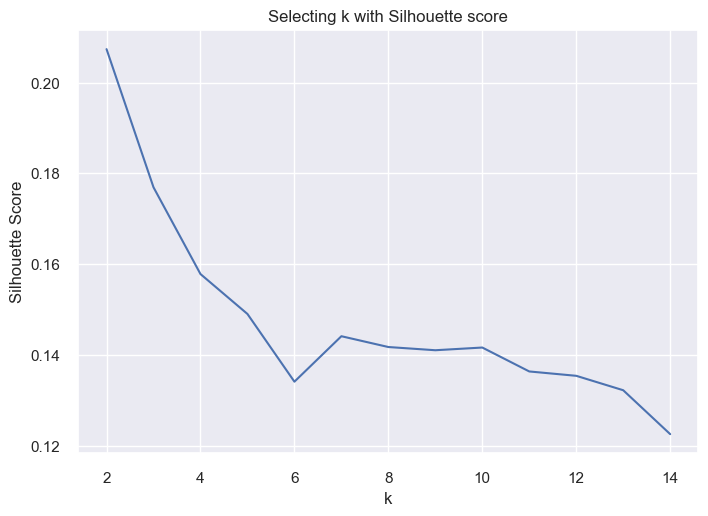

CPU times: total: 47.4 s
Wall time: 28.8 s


In [102]:
%%time

clusters = list(range(2,15))
n_init = 10
clustersize = 1000
random_state = 42

run_minibatch_k_means(pscores_sample, clusters, n_init, clustersize, random_state)

For unscaled data


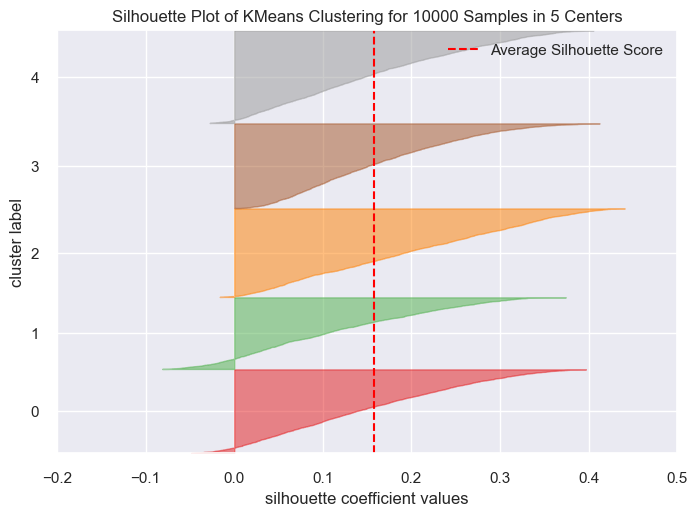

In [103]:
optimal_k = 5 #optimal value of k from the Silhouette score
n_init = 10
random_state = 42

# for unscaled data, all columns are on the same scale
print('For unscaled data')
plot_silhouette(pscores_sample, optimal_k, n_init, random_state)


For n_clusters = 2, WCSS: = 2338404.2991185095, Silhouette score: 0.20909656326431103)
For n_clusters = 3, WCSS: = 2047094.0543607692, Silhouette score: 0.16986271448881612)
For n_clusters = 4, WCSS: = 1840046.7728648498, Silhouette score: 0.15996314603205383)
For n_clusters = 5, WCSS: = 1688666.4845632091, Silhouette score: 0.16079836558166316)
For n_clusters = 6, WCSS: = 1587411.166379832, Silhouette score: 0.15498908779741682)
For n_clusters = 7, WCSS: = 1505987.599592246, Silhouette score: 0.14942204857502173)
For n_clusters = 8, WCSS: = 1433025.7884274612, Silhouette score: 0.15396976593027425)
For n_clusters = 9, WCSS: = 1364282.31267081, Silhouette score: 0.14960713665176564)
For n_clusters = 10, WCSS: = 1309201.143855227, Silhouette score: 0.14540946960890133)
For n_clusters = 11, WCSS: = 1263235.753099904, Silhouette score: 0.14640370279387088)
For n_clusters = 12, WCSS: = 1221546.5341310515, Silhouette score: 0.14607365096007646)
For n_clusters = 13, WCSS: = 1181956.003857745

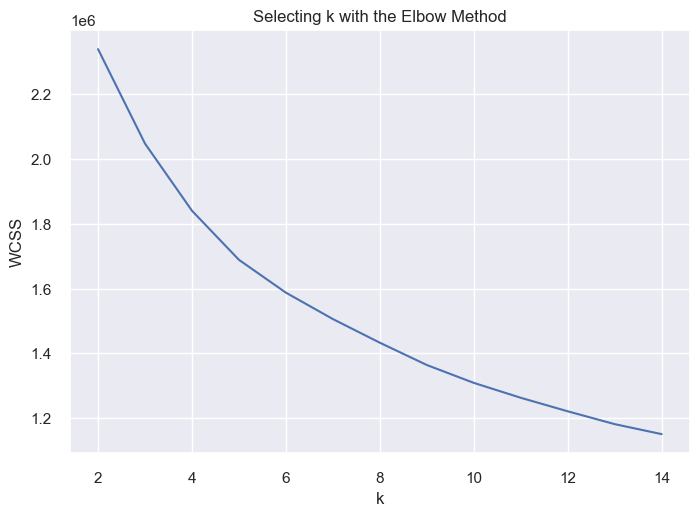

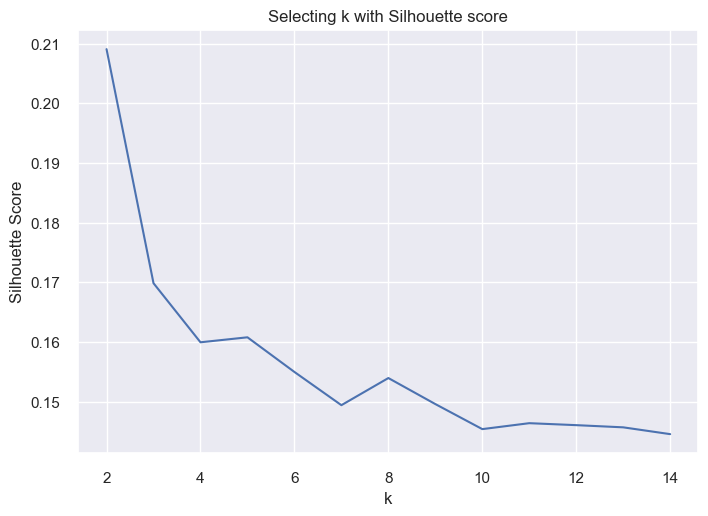

CPU times: total: 56.5 s
Wall time: 33.2 s


In [21]:
%%time

clusters = list(range(2,15))
n_init = 10
random_state = 42

run_k_means(pscores_sample, clusters, n_init, random_state)

For unscaled data


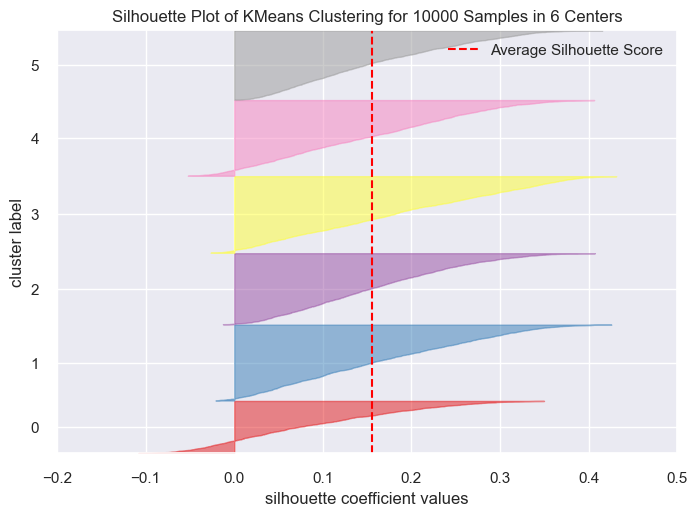

In [22]:
optimal_k = 6 #optimal value of k from the Silhouette score
n_init = 10
random_state = 42

# for unscaled data
print('For unscaled data')
plot_silhouette(pscores_sample, optimal_k, n_init, random_state)


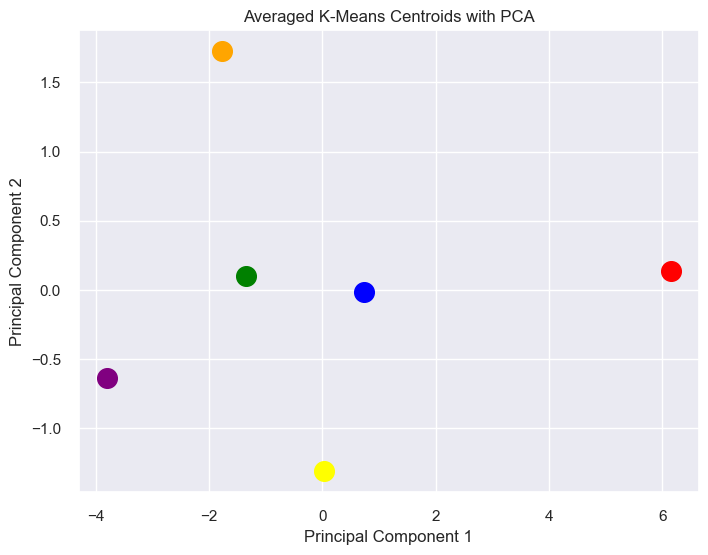

CPU times: total: 1min 38s
Wall time: 25 s


In [23]:
%%time

num_samples = 12
optimal_k = 6  #optimal number of clusters from "pscores" samples 
cluster_assignments = []
centroids = []
num_components = 2
sample_size = 100000

# K-Means clustering on multiple samples and collect cluster assignments and centroids
for i in range(num_samples):
    pscores_sample = pscores.sample(sample_size)

    kmeans = KMeans(n_clusters=optimal_k)
    cluster_labels = kmeans.fit_predict(pscores_sample)
    pscores_sample[f'Cluster_{i+1}'] = cluster_labels
    
    cluster_assignments.append(kmeans.labels_)
    centroids.append(kmeans.cluster_centers_)

# Average the cluster assignments and centroids
average_cluster_assignments = np.mean(cluster_assignments, axis=0)
average_centroids = np.mean(centroids, axis=0)

# Reduce dimensionality using PCA
pca = PCA(n_components=num_components)
reduced_centroids = pca.fit_transform(average_centroids)

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black'] 

# Visualize in reduced space
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(reduced_centroids[i, 0], reduced_centroids[i, 1], 
                marker='o', s=200, color=colors[i], label=f'Cluster {i+1}')
plt.title('Averaged K-Means Centroids with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:1072: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



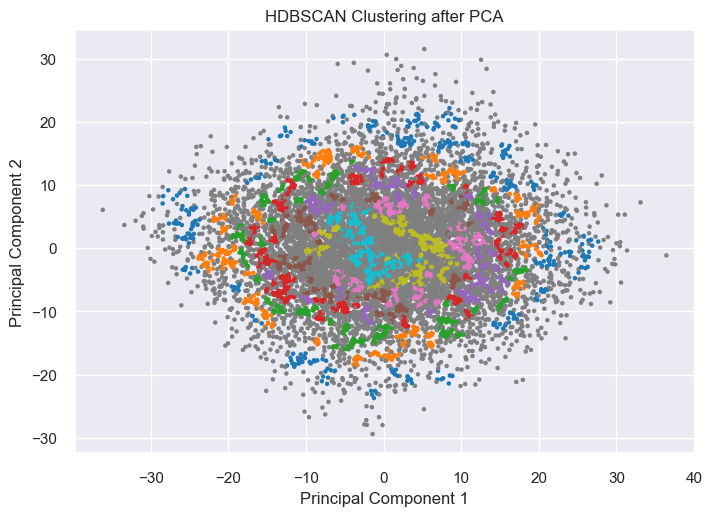

In [106]:
pscores_sample = pscores.sample(10000)
X = pscores_sample.values 

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X)

# HDBSCAN clustering on reduced dimensions
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
cluster_labels = clusterer.fit_predict(X_pca)

# Adding the cluster labels to the DataFrame
pscores_sample['HDBCluster_Labels'] = cluster_labels

# Apply cluster labels 
unique_labels = np.unique(cluster_labels)
unique_labels = unique_labels[unique_labels != -1]  # Exclude noise points if present
num_clusters = len(unique_labels)

# Assign colors based on the clusters
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'black'] 
if num_clusters > len(colors):
    import matplotlib.cm as cm
    colors = cm.tab10(np.linspace(0, 1, num_clusters))

    # Gray dots are considered noise
label_color_map = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}
cluster_colors = [label_color_map[label] if label != -1 else 'gray' for label in cluster_labels]

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors, s=5)
plt.title('HDBSCAN Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



In [107]:
pscores_sample_reduced = pscores_sample.sample(frac = 0.5) 

silhouette_avg = silhouette_score(pscores_sample_reduced, pscores_sample_reduced['HDBCluster_Labels'])
print(f"Silhouette Score: {silhouette_avg}")

#Produces negative S-score, which doesn't provide distinct clusters for this dataset

Silhouette Score: -0.1270180127963943


In [26]:
def plot_dendrogram(model, **kwargs): #From scikit-learn.org
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    linkage_matrix = np.zeros((len(model.children_),4))
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

        if i < len(model.labels_): 
            linkage_matrix[i] = [merge[0], merge[1], model.distances_[i], current_count]

    dendrogram(linkage_matrix, **kwargs)



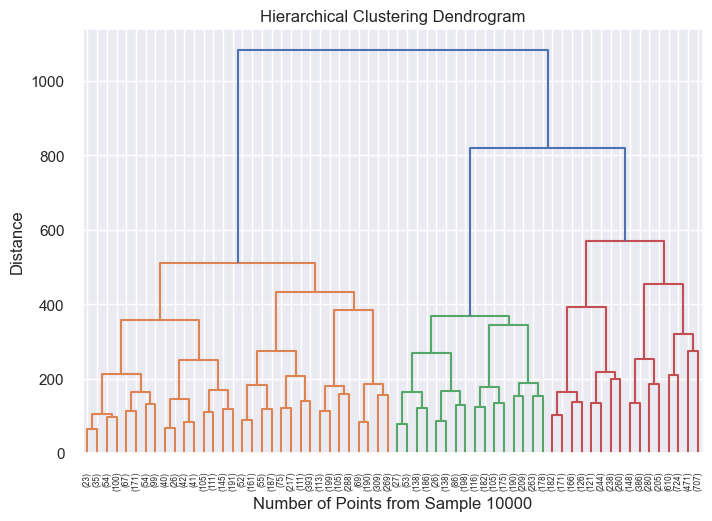

In [27]:
#Perform Hierarchical Clustering for Dendrogram
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
pscores_sample_reduced = pscores.sample(frac = 0.02) 

model = model.fit(pscores_sample_reduced)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel(f'Number of Points from Sample {pscores_sample.shape[0]}')
plt.ylabel('Distance')
plt.show()

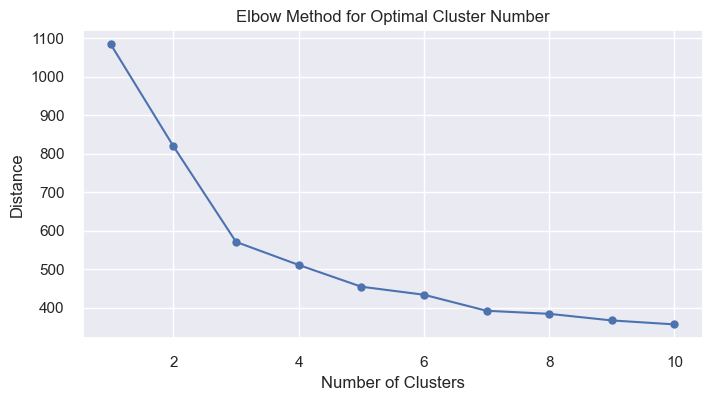

In [28]:
distance_matrix = pdist(pscores_sample_reduced)

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Elbow method
last = linkage_matrix[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.figure(figsize=(8, 4))
plt.plot(idxs, last_rev, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

# Shows optimal k to be 4

In [29]:
%%time

sample_size = 100000 
num_samples = 20 # Selecting a large enough number but not optimized yet
num_clusters = 6  # Optimal_k based on K-means on Pscores (same for Answers)

# Randomly select a sample rows from the dataset
pscores_sample = pscores.sample(n=sample_size)
sample_indices = pscores_sample.shape[0]

# Bagging with clustering
cluster_assignments = []

for i in range(num_samples):
    # Randomizing samples
    pscores_resample = pscores_sample.sample(n=sample_size)
    sample_indices = pscores_resample.shape[0]

    # K-Means clustering on the resampled data
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(pscores_resample)
    
    # Append cluster assignments to the list
    cluster_assignments.append(cluster_labels)

# Calculate mode for each row across samples
mode_cluster_assignments = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=np.array(cluster_assignments))

# Assign cluster labels to the "answers" sample using the mode assignments
kmeans_final = KMeans(n_clusters=num_clusters)
kmeans_final.fit(pscores_sample)
cluster_labels = kmeans_final.predict(pscores)

# Assign the cluster labels to the original dataset for answers, pscores, and cleaned dataset
answers_with_clusters = pd.DataFrame(answers)
answers_with_clusters['Cluster'] = cluster_labels
pscores_with_clusters = pd.DataFrame(pscores)
pscores_with_clusters['Cluster'] = cluster_labels


CPU times: total: 5min 11s
Wall time: 49 s


Highest Sillhouette scores come from clusters created from the personality scores, these clusters will be generated and appended back into the cleaned dataset, or subsets of the cleaned dataset.

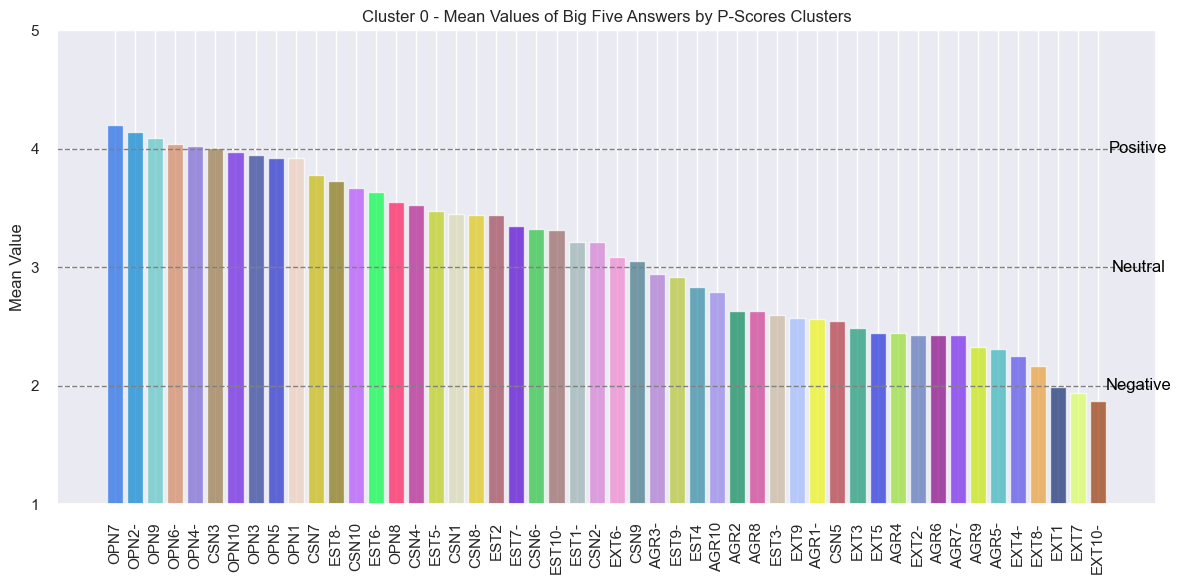

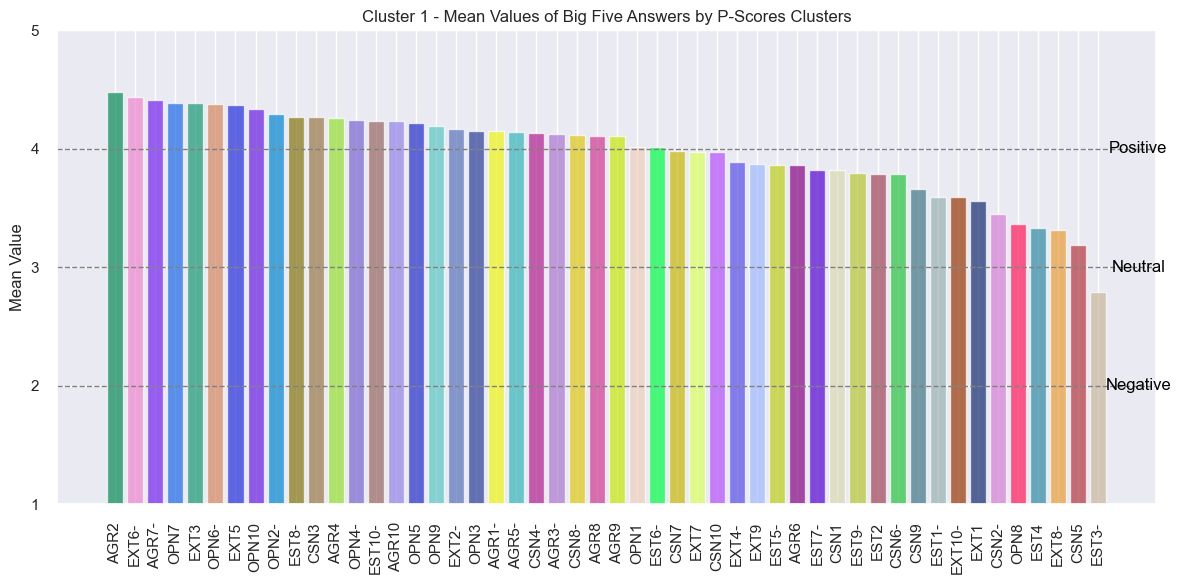

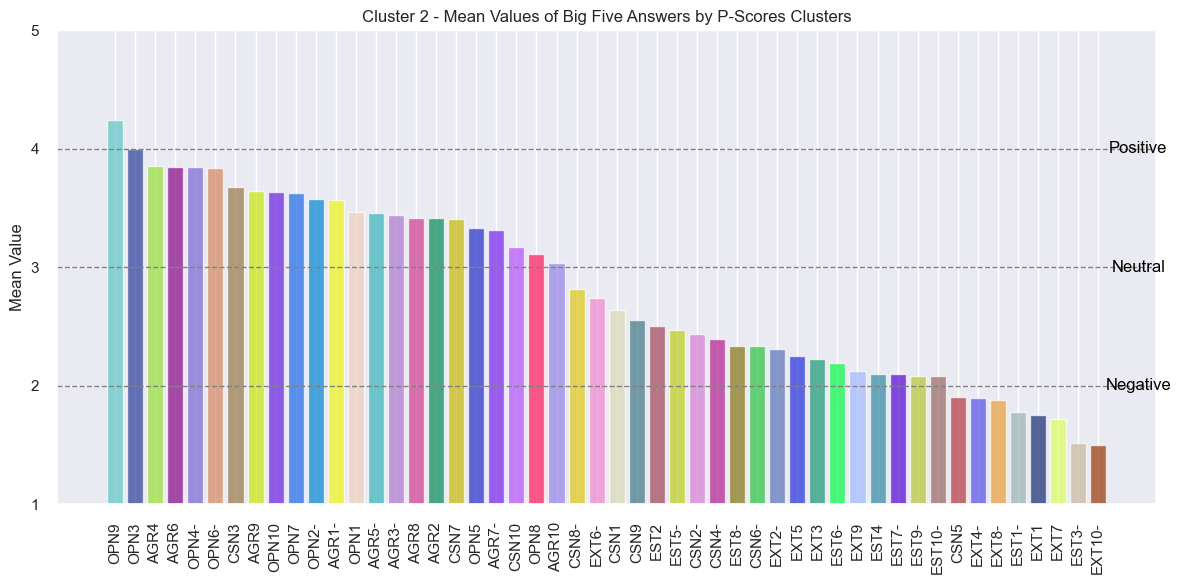

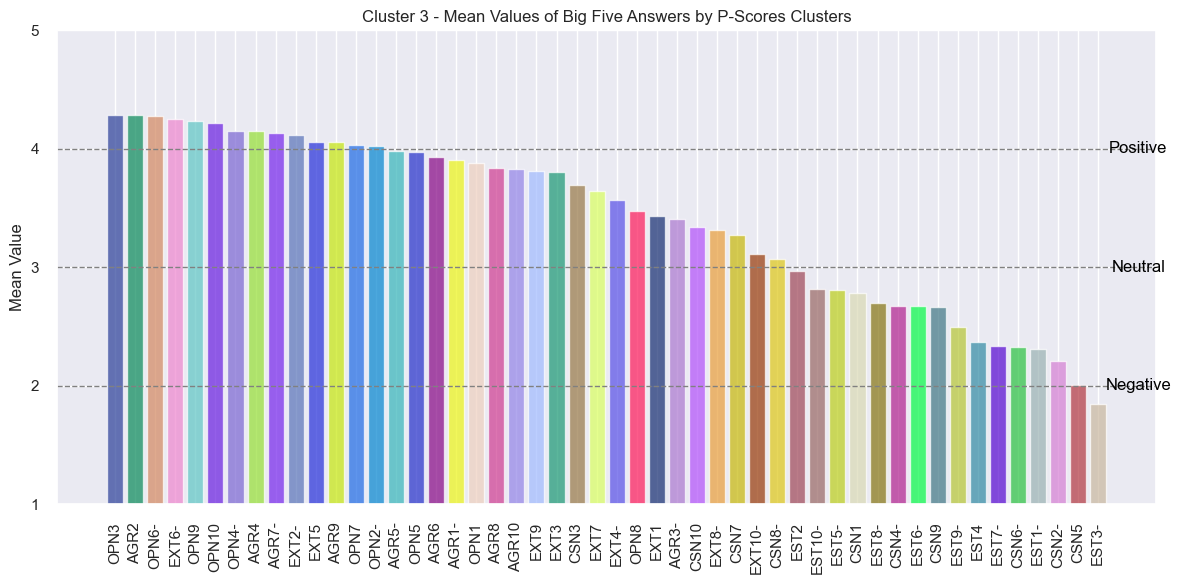

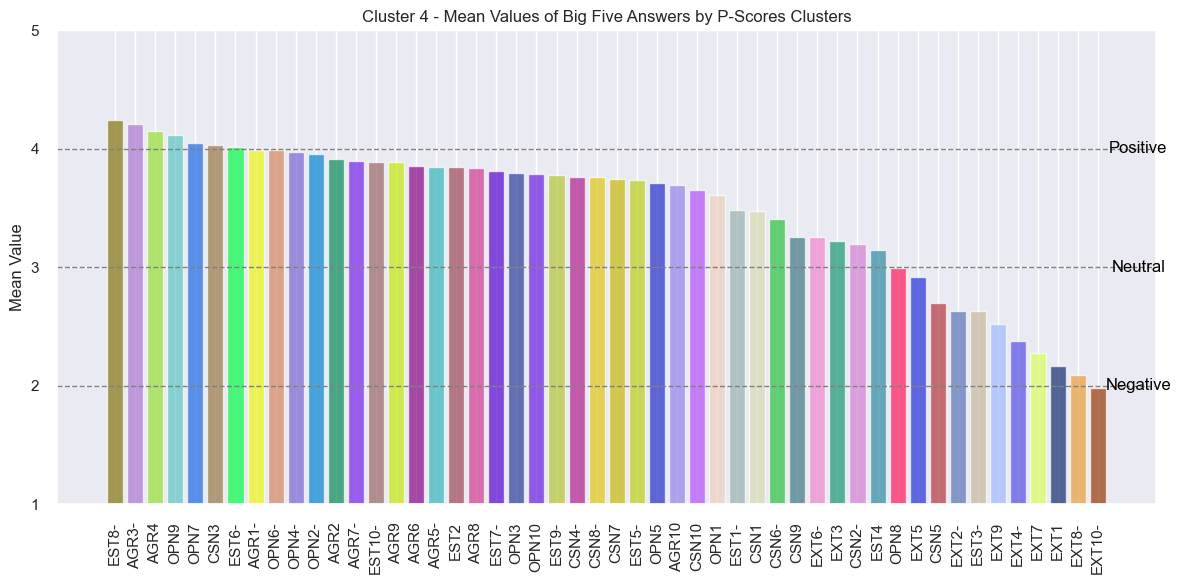

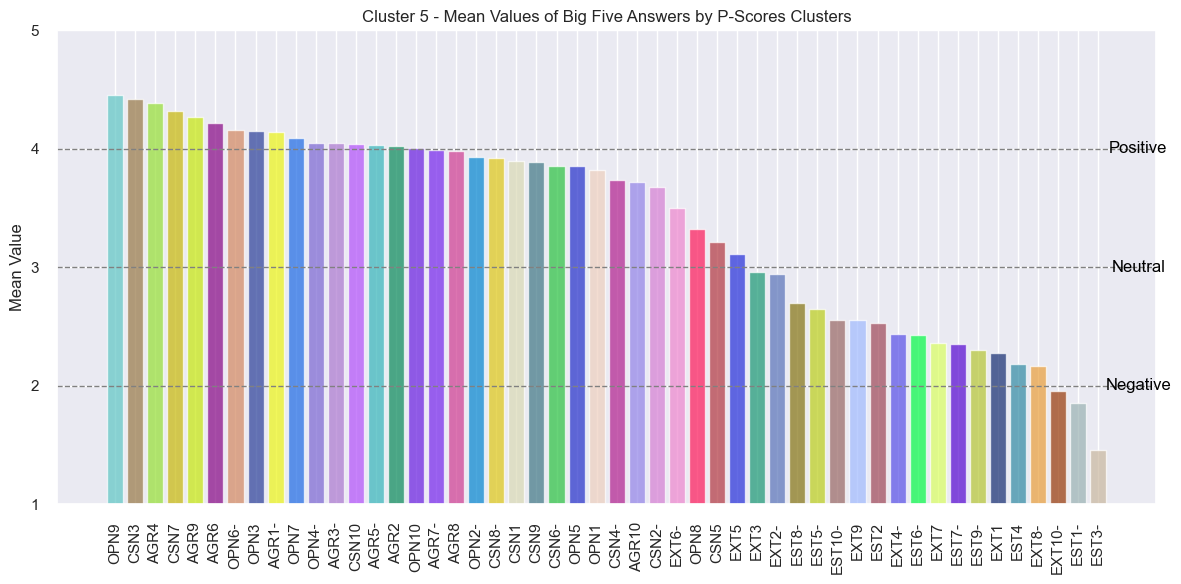

In [30]:
answers_bycluster = answers_with_clusters.groupby('Cluster')
mean_data = answers_bycluster.mean()

num_clusters = len(answers_bycluster)
num_columns_to_visualize = 50

column_colors = {column: np.random.rand(3,) for column in mean_data.columns}

for i in range(num_clusters):
    plt.figure(figsize=(12, 6))
    current_cluster_data = mean_data.loc[i] 
    columns_to_visualize = current_cluster_data.nlargest(num_columns_to_visualize).index.tolist()
    
    # Plotting bar graphs
    for column in columns_to_visualize:
        plt.bar(column, current_cluster_data[column], label=f'Cluster {i}', alpha=0.7, color=column_colors[column])

    # Adding indication lines for how it correlated with the answers
    plt.axhline(y=4, color='gray', linestyle='--', linewidth=1)
    plt.text(len(columns_to_visualize) + 1, 4, 'Positive', color='black', ha='center', va='center')
    plt.axhline(y=3, color='gray', linestyle='--', linewidth=1)
    plt.text(len(columns_to_visualize) + 1, 3, 'Neutral', color='black', ha='center', va='center')
    plt.axhline(y=2, color='gray', linestyle='--', linewidth=1)
    plt.text(len(columns_to_visualize) + 1, 2, 'Negative', color='black', ha='center', va='center')
    
    plt.title(f'Cluster {i} - Mean Values of Big Five Answers by P-Scores Clusters')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=90)
    
    plt.ylim(1, 5)
    plt.yticks(np.arange(1, 6, 1))
    plt.tight_layout()
    plt.show()

In [31]:
bigfive_with_clusters = pd.DataFrame(bigfive_df).copy()
bigfive_with_clusters['Cluster'] = cluster_labels


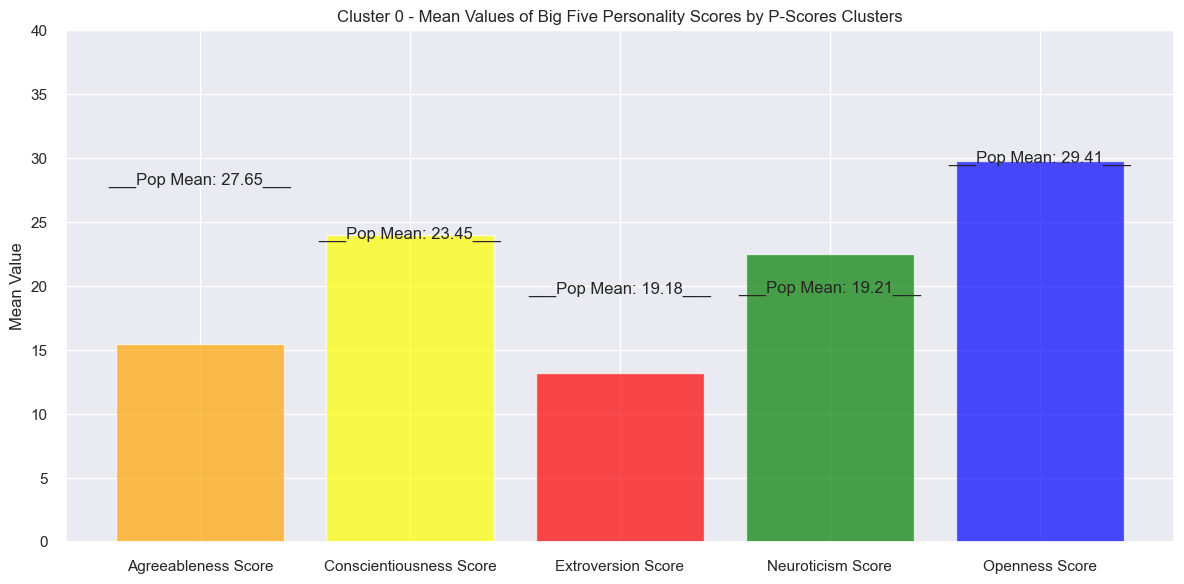

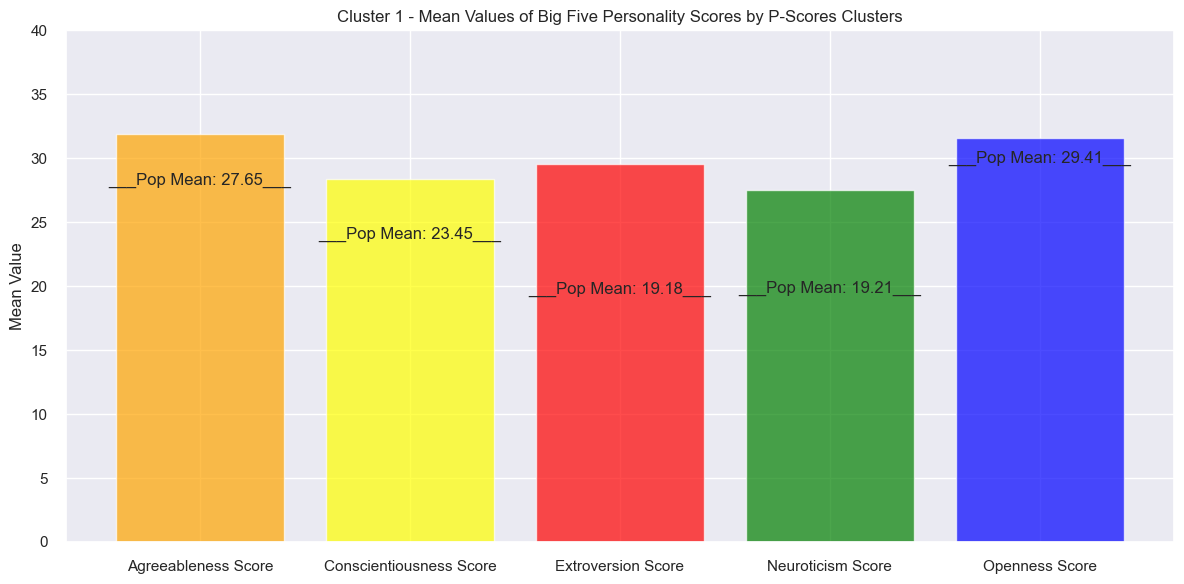

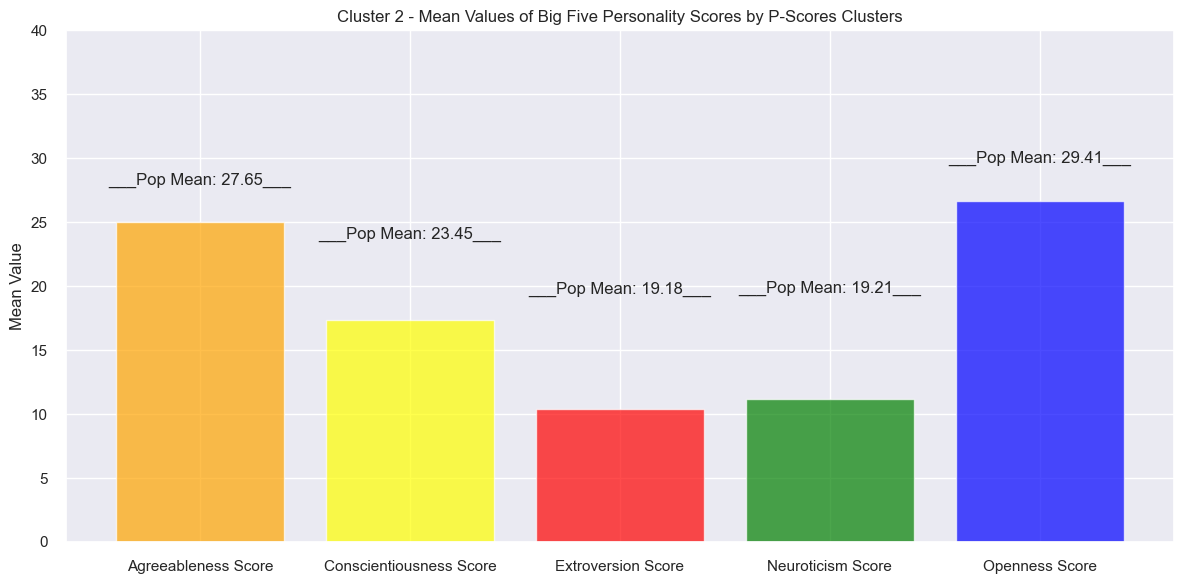

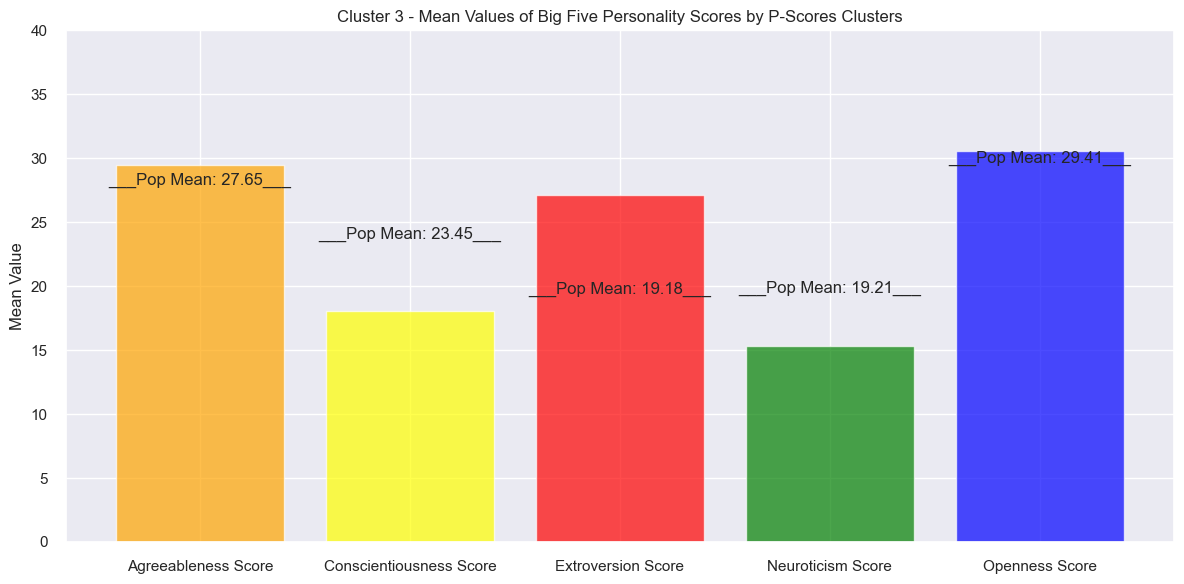

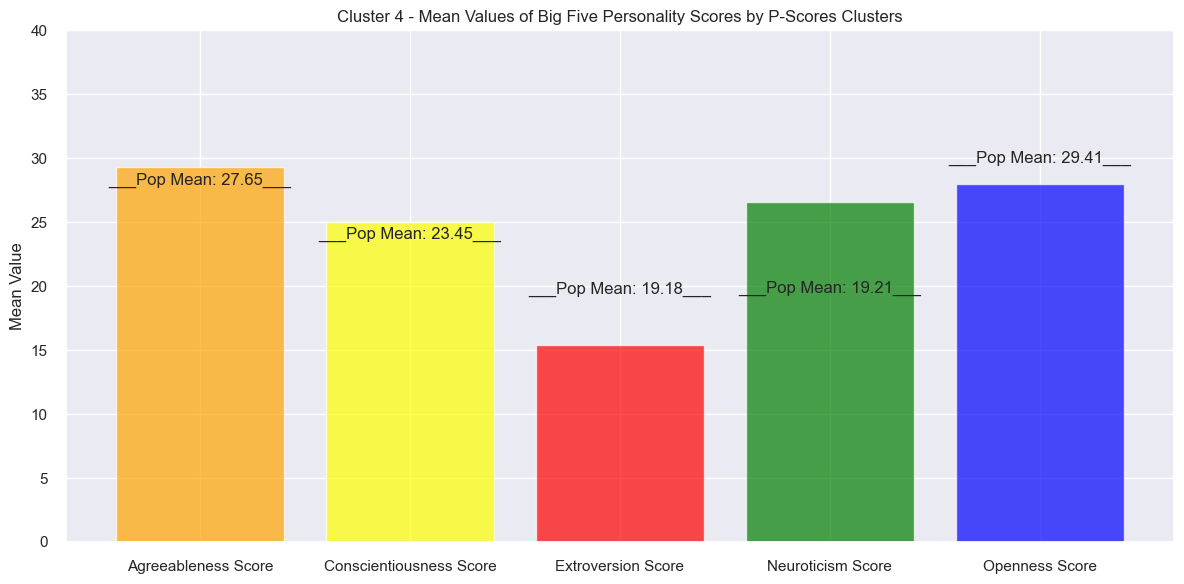

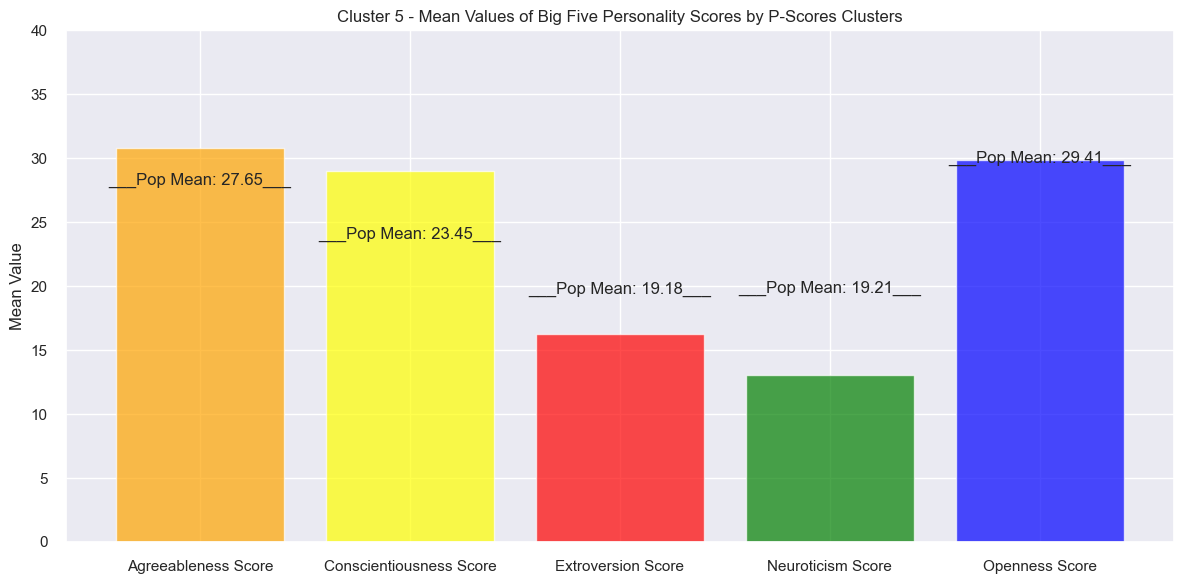

In [32]:
pscores_bycluster = pscores_with_clusters.groupby('Cluster')
mean_data = pscores_bycluster.mean()

num_clusters = len(pscores_bycluster)
num_columns_to_visualize = 5

column_colors = {'Extroversion Score': 'red', 'Agreeableness Score': 'orange', 
                 'Conscientiousness Score': 'yellow', 'Neuroticism Score': 'green', 
                 'Openness Score': 'blue'}

for i in range(num_clusters):
    plt.figure(figsize=(12, 6))
    current_cluster_data = mean_data.loc[i]
    columns_to_visualize = current_cluster_data.nlargest(num_columns_to_visualize).index.tolist()
    columns_to_visualize.sort()
    
    # Plotting bar graphs
    for column in columns_to_visualize:
        color = column_colors.get(column, 'gray')
        bar = plt.bar(column, current_cluster_data[column], label=f'Cluster {i}', alpha=0.7, color=color)
        
        # Adding indication lines for population average, lining up with underscore on annotation
        population_mean = pscores_with_clusters[column].mean()
        #plt.axhline(y=population_mean, color='black', linestyle=' ', linewidth=1)
        bar_index = columns_to_visualize.index(column)
        plt.annotate(f'___Pop Mean: {population_mean:.2f}___', xy=(bar_index, population_mean),
                     xytext=(0, 0), textcoords='offset points', ha='center', va='bottom')

        
    plt.title(f'Cluster {i} - Mean Values of Big Five Personality Scores by P-Scores Clusters')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.ylim(0, 40)
    plt.tight_layout()
    plt.show()

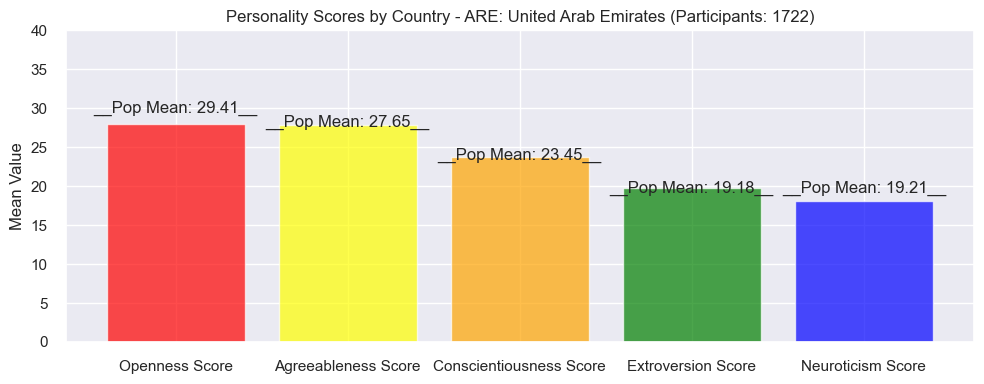

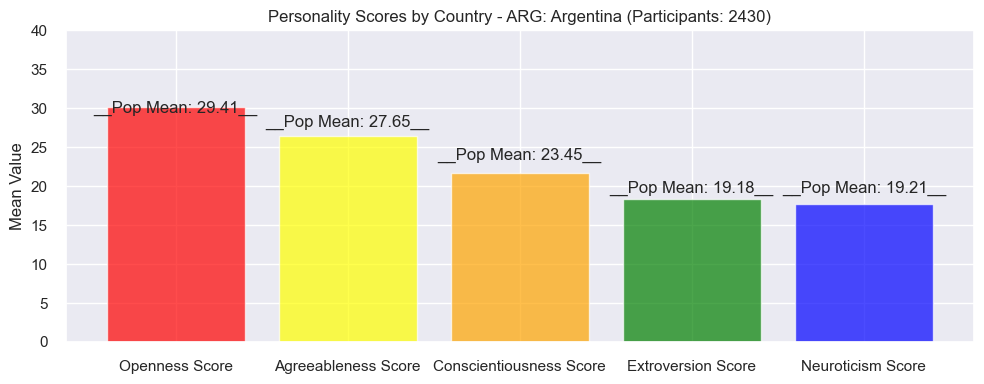

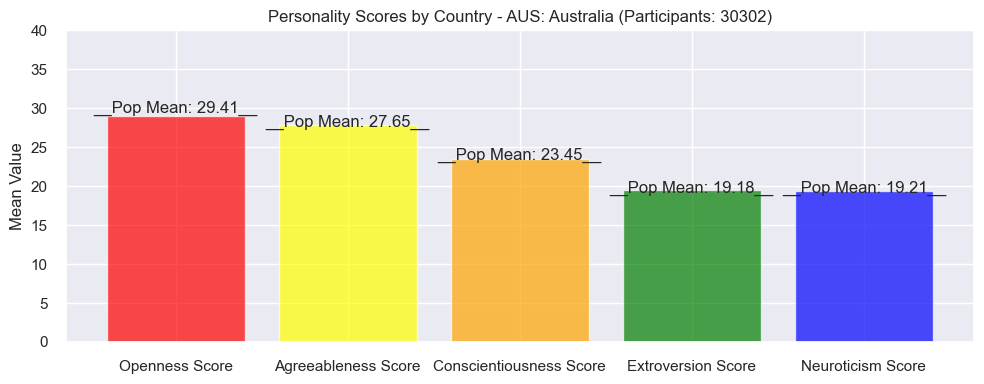

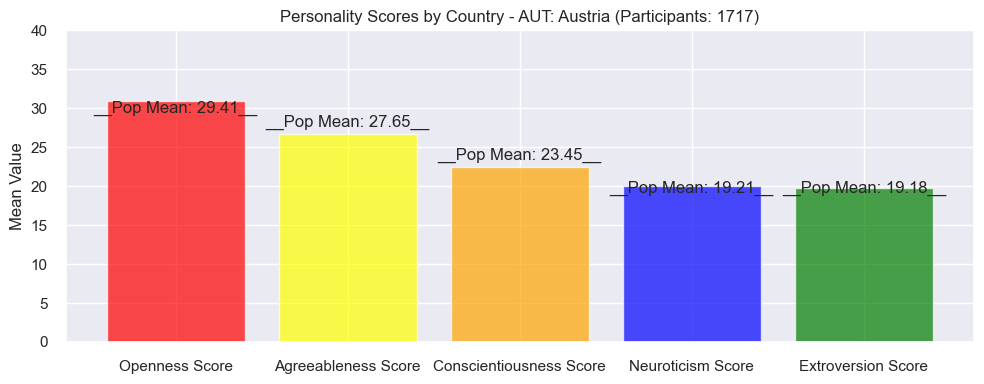

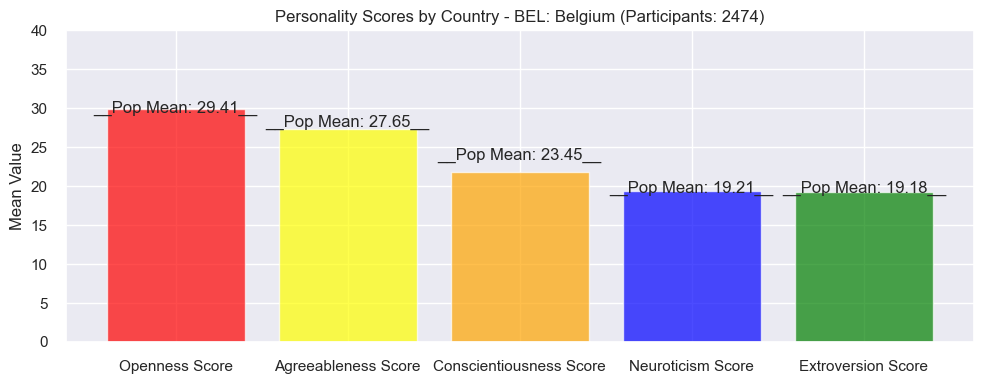

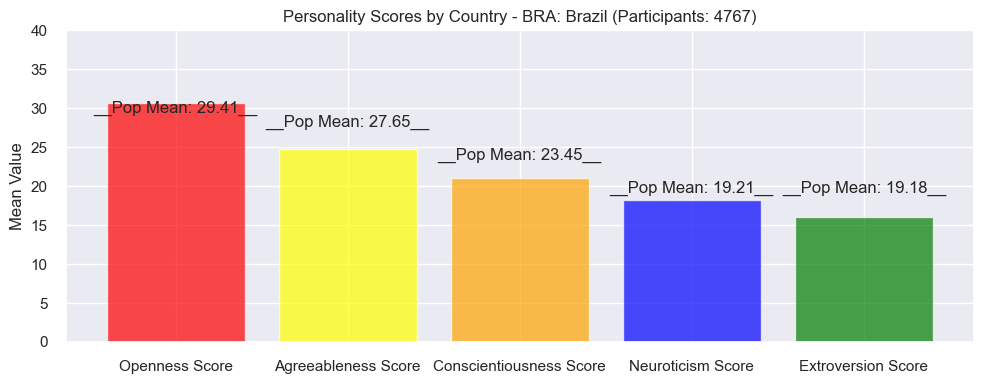

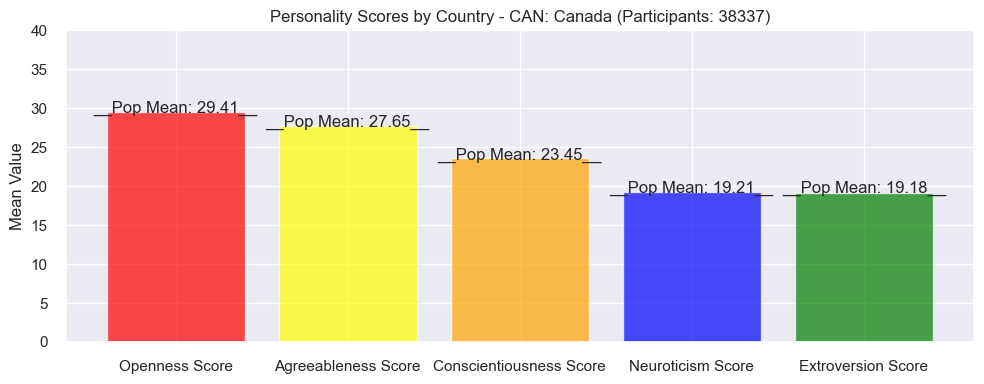

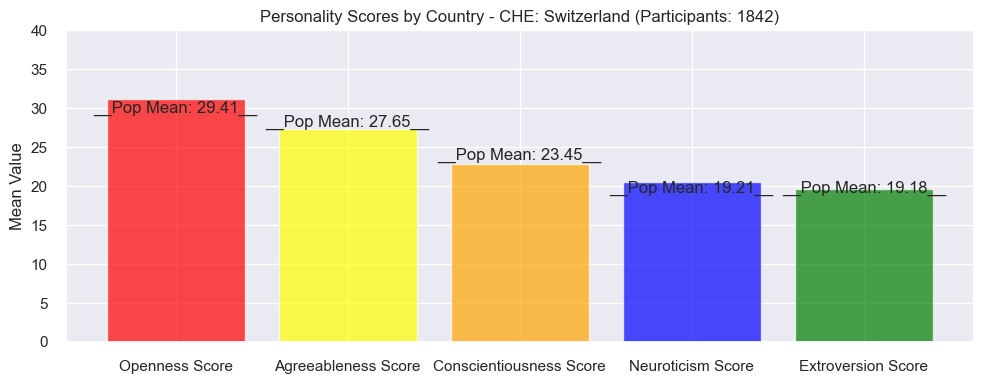

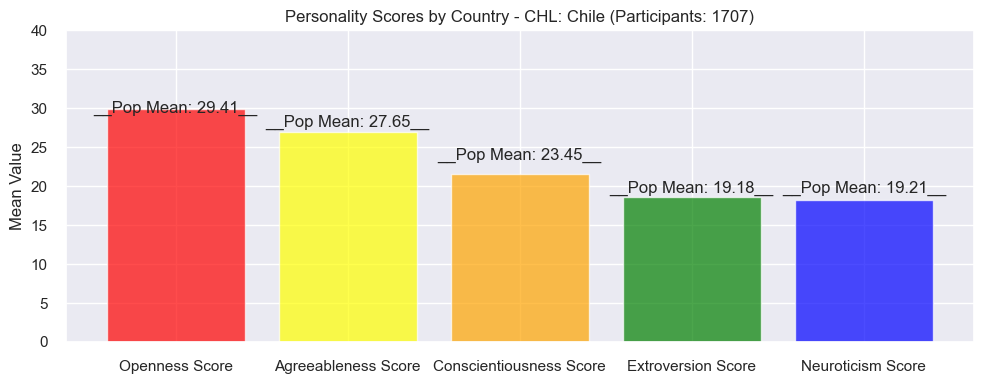

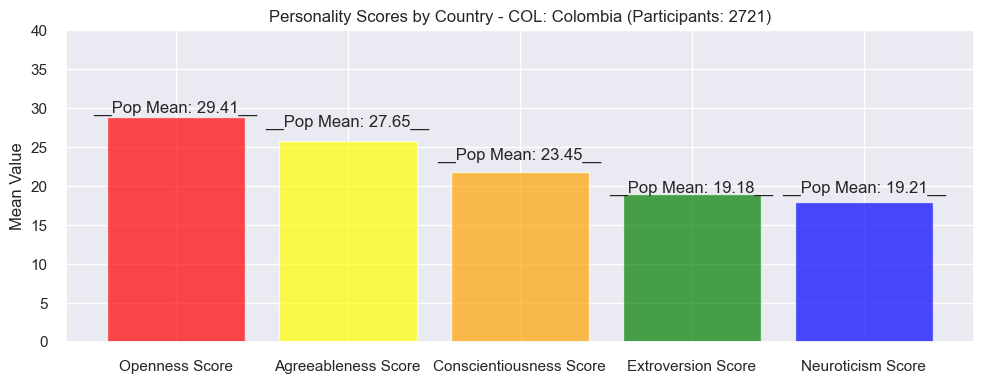

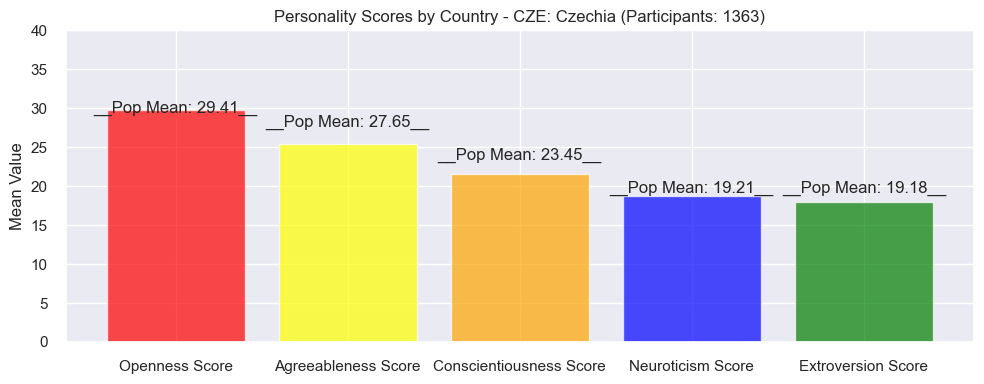

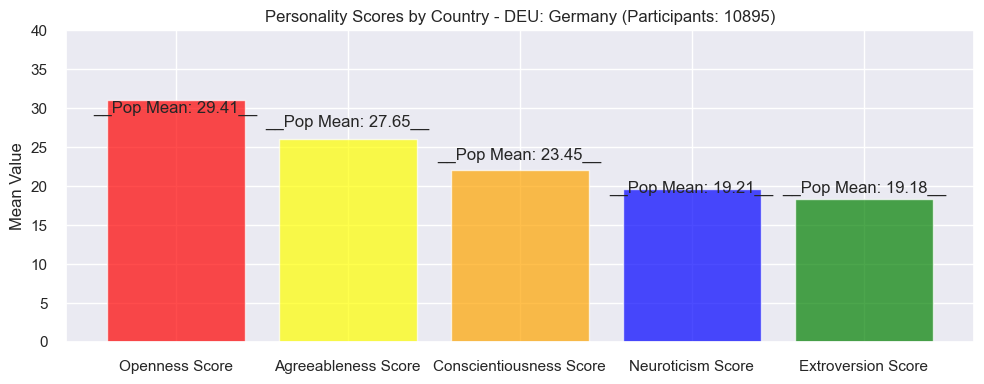

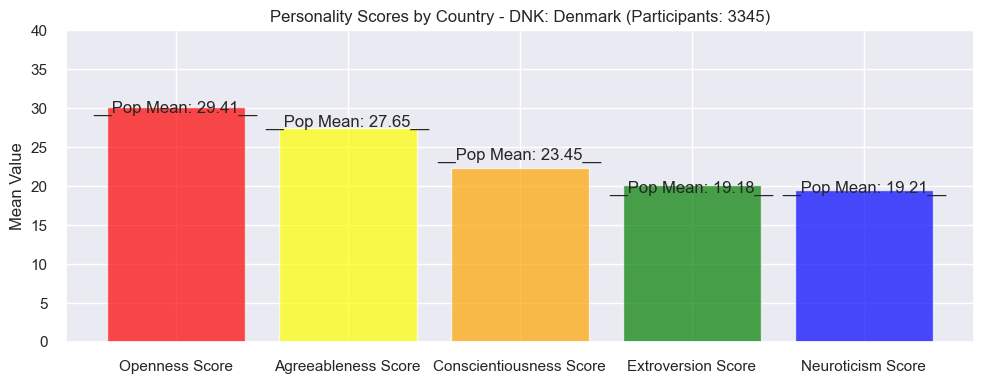

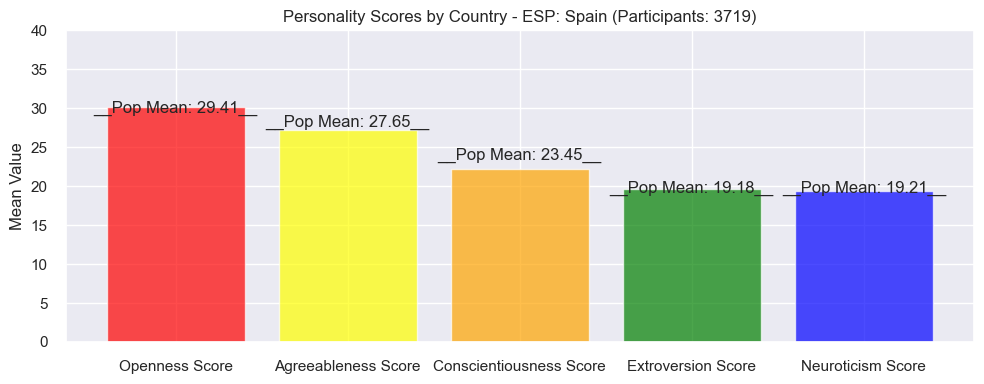

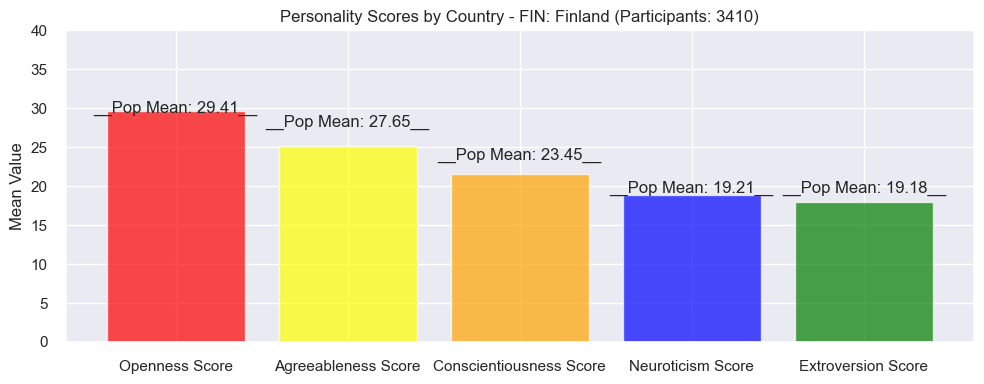

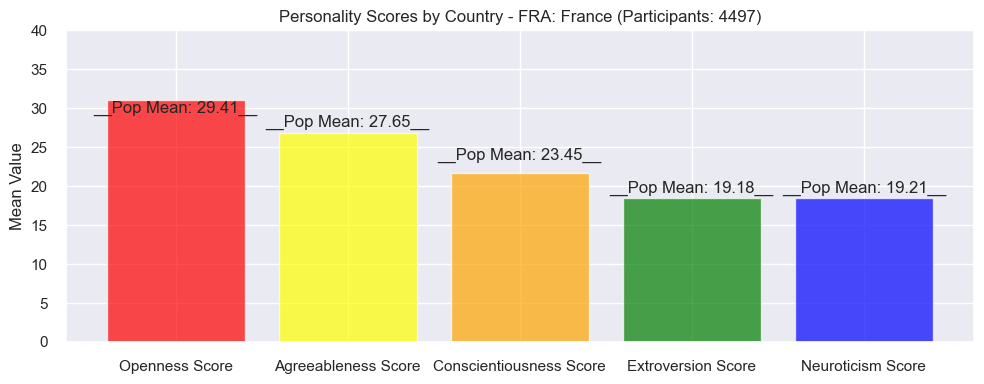

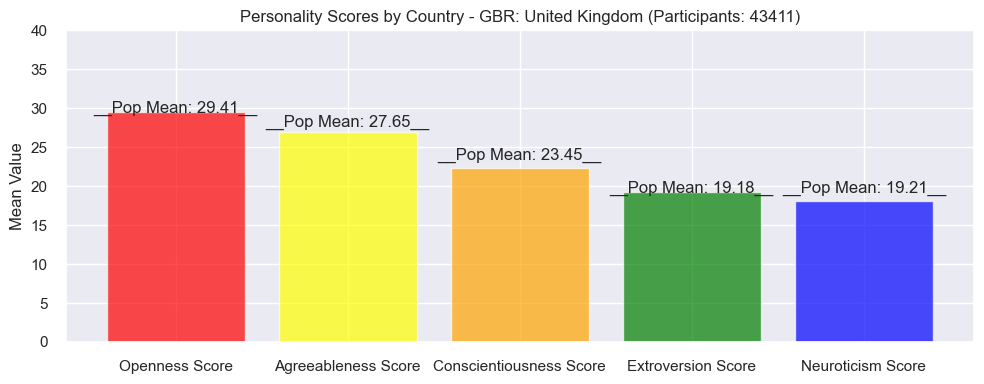

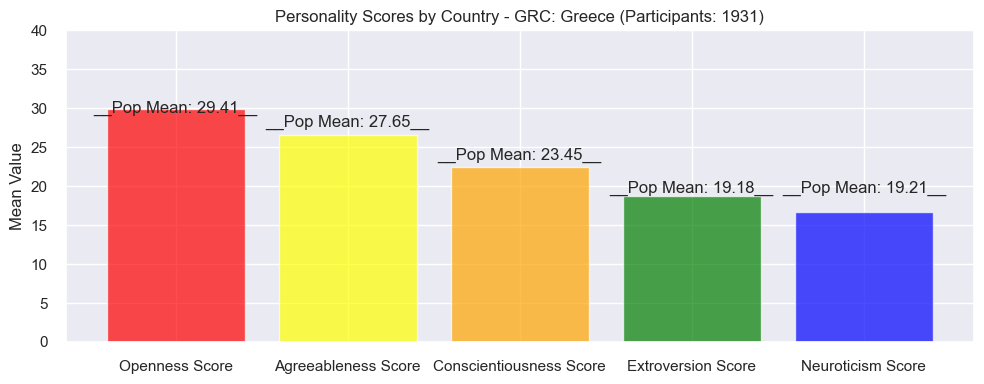

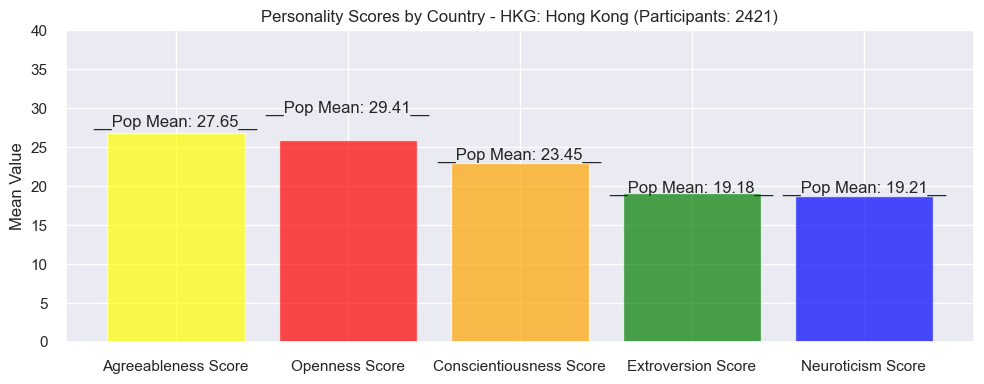

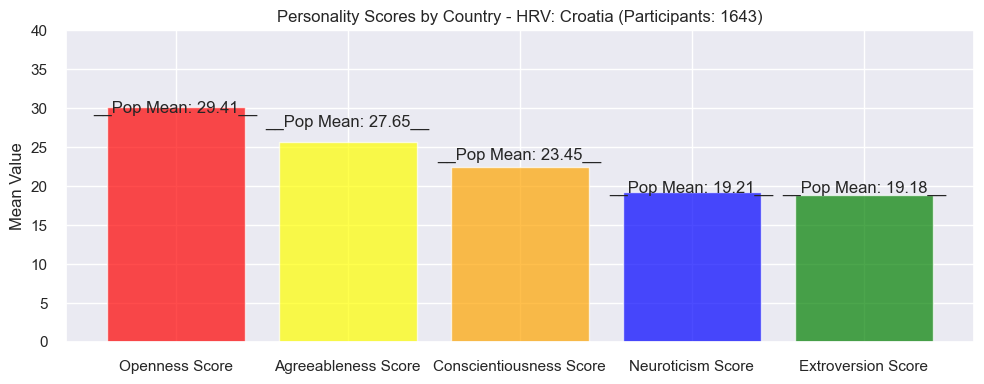

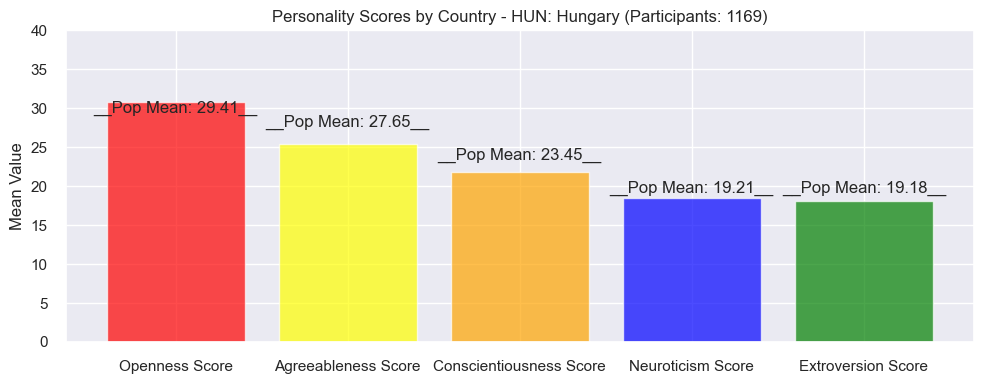

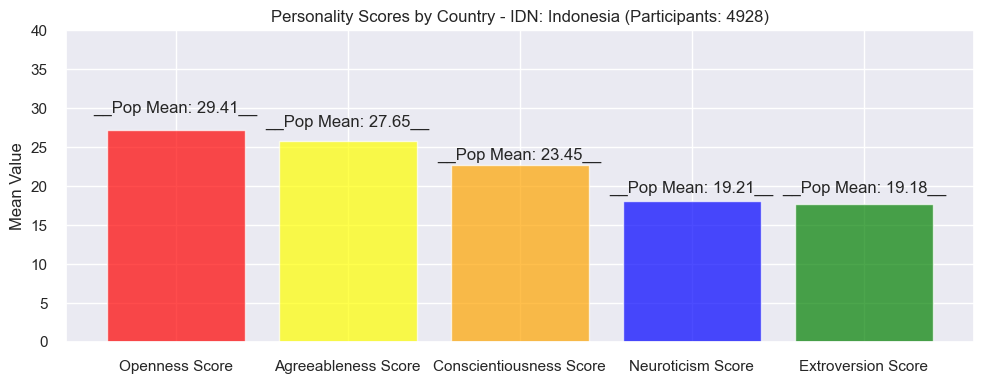

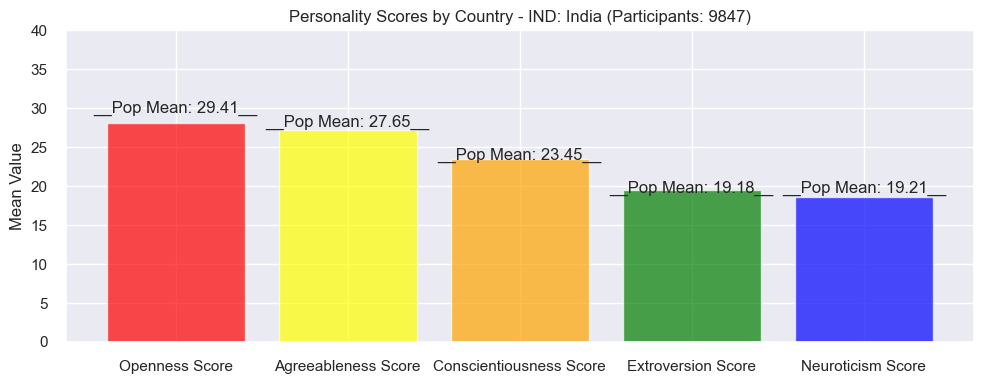

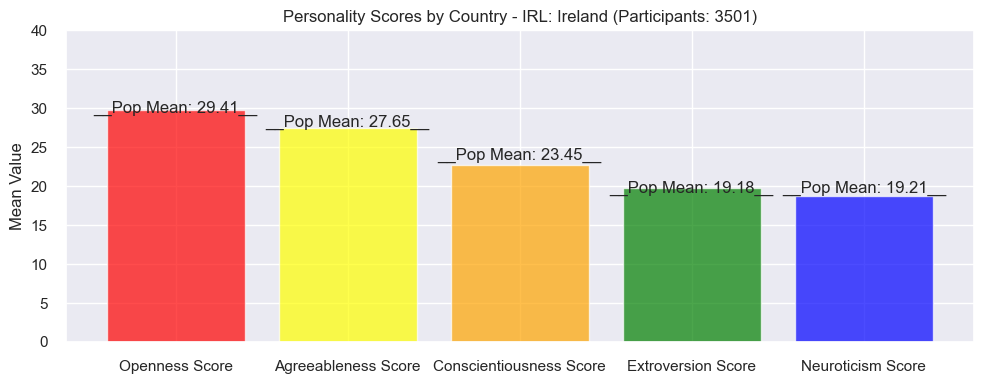

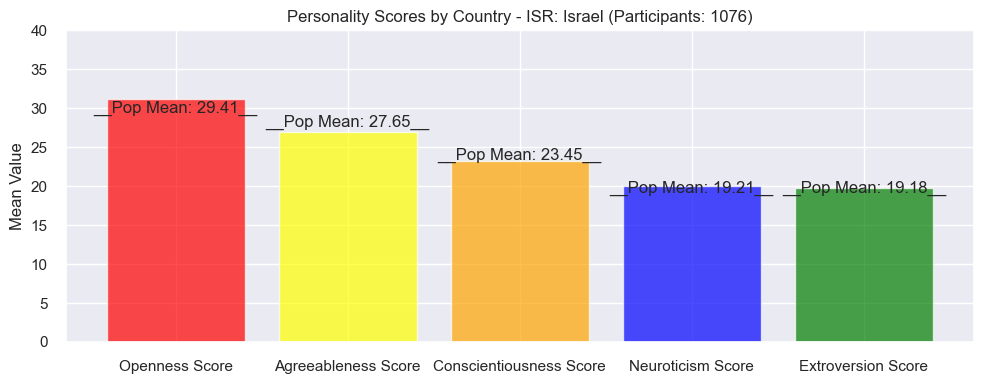

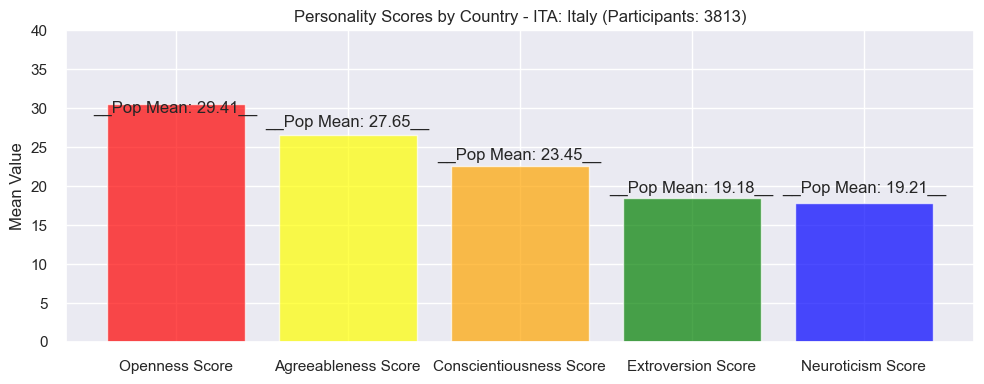

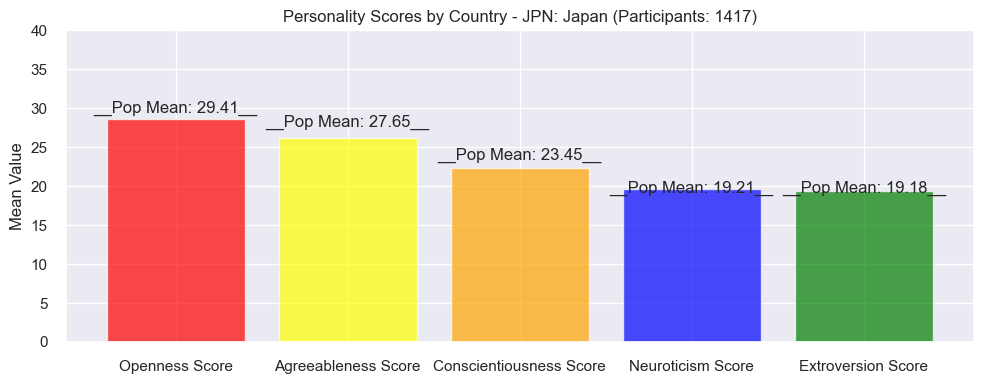

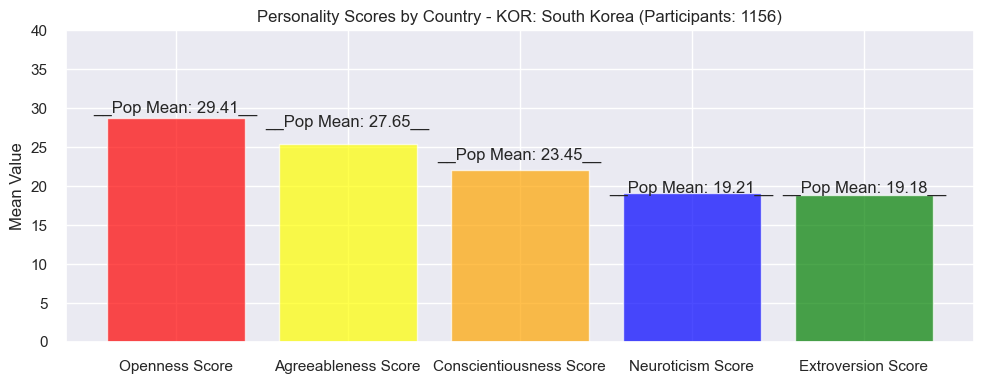

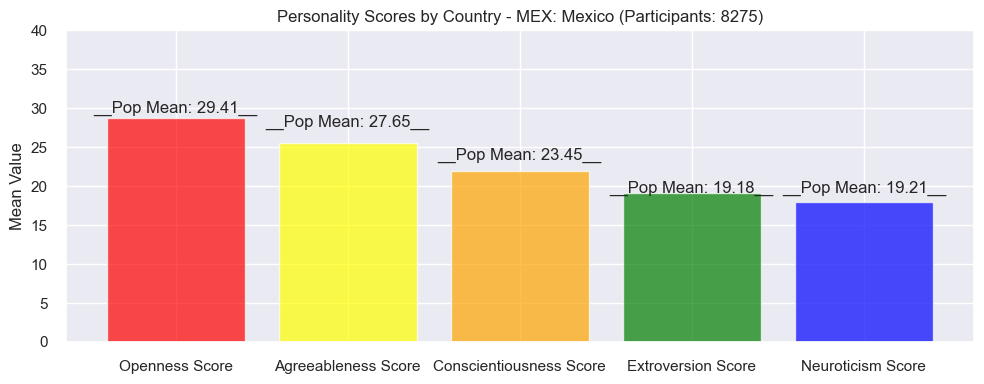

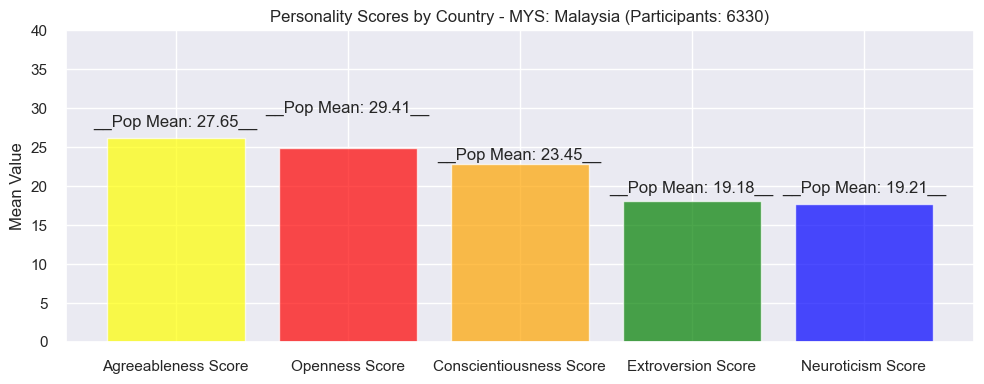

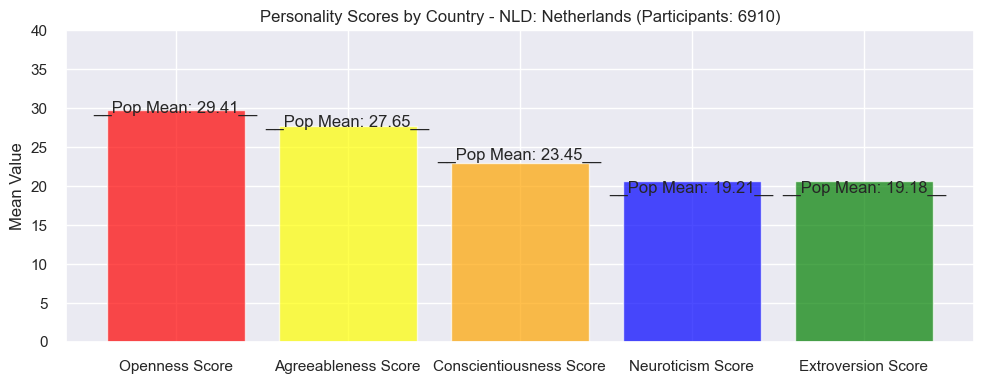

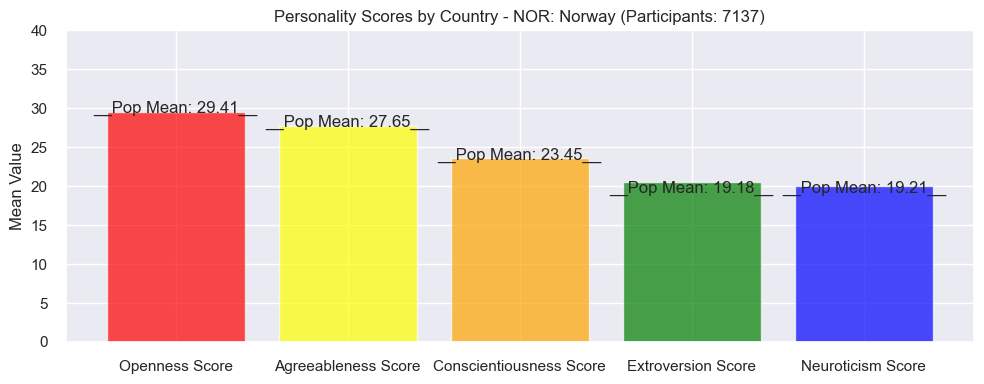

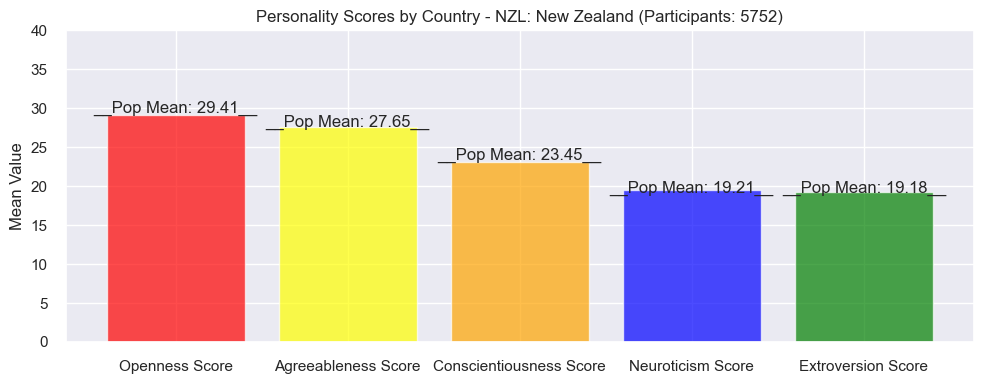

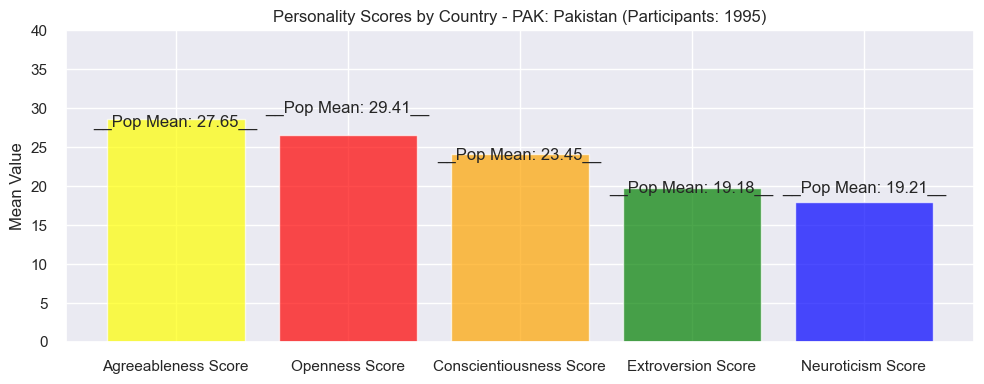

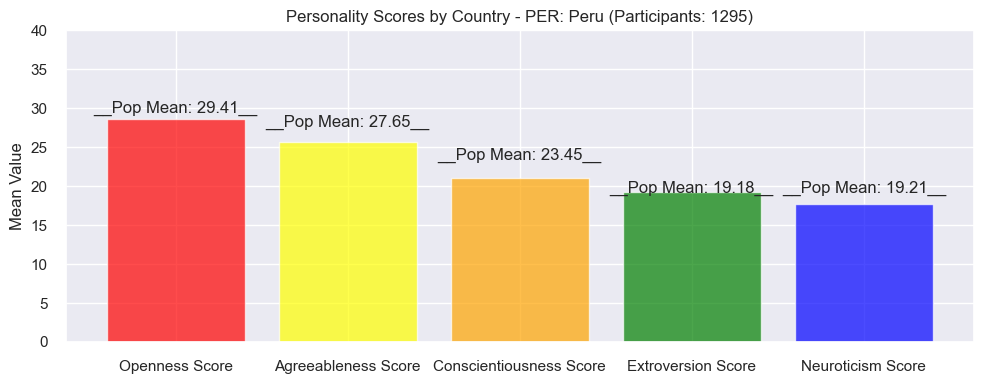

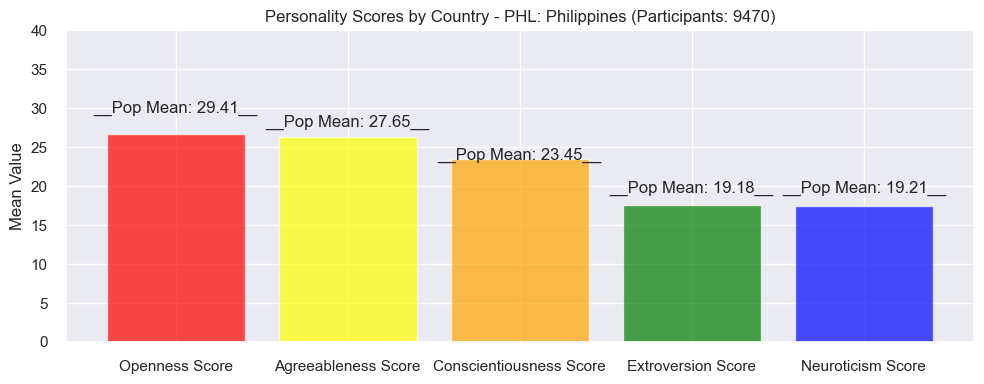

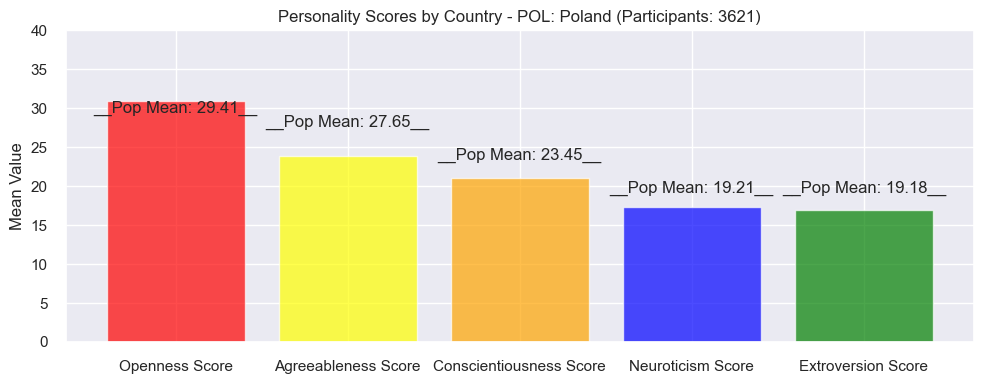

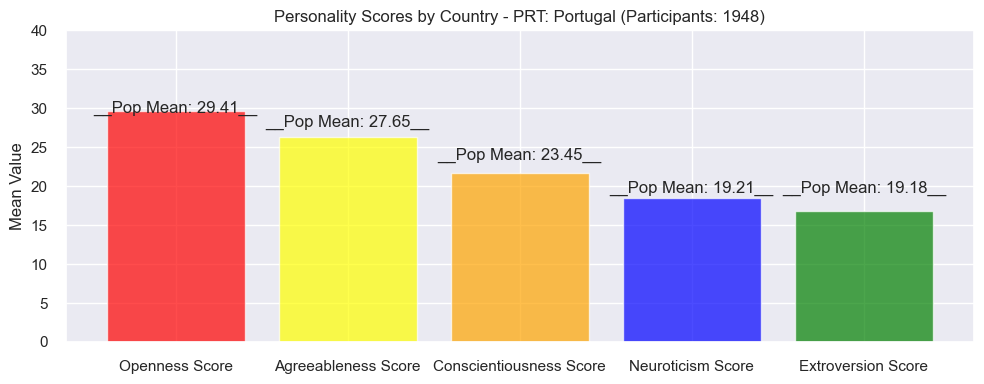

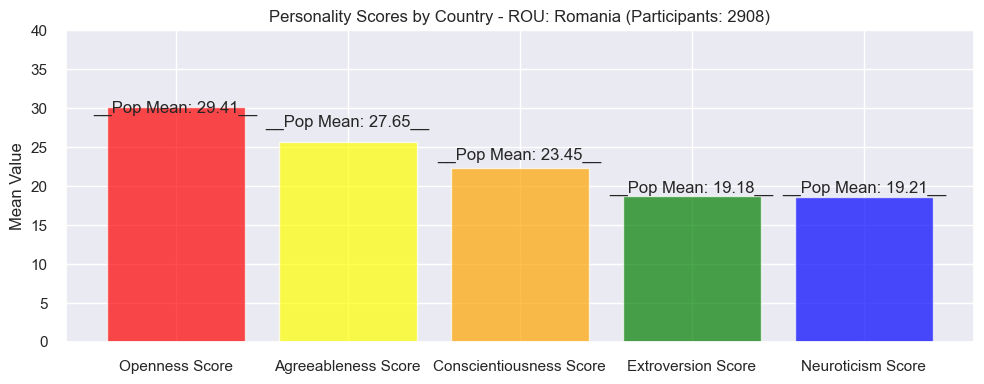

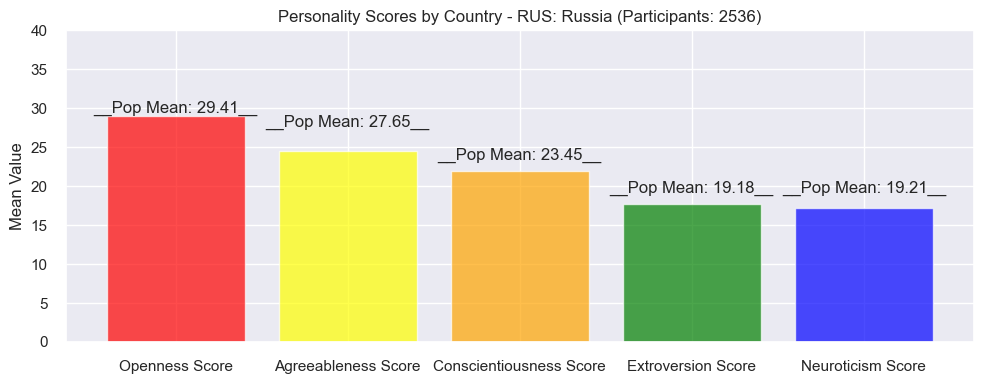

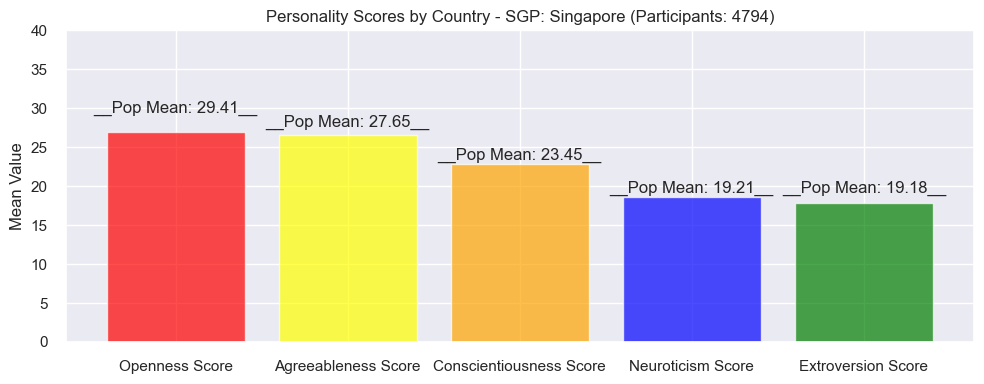

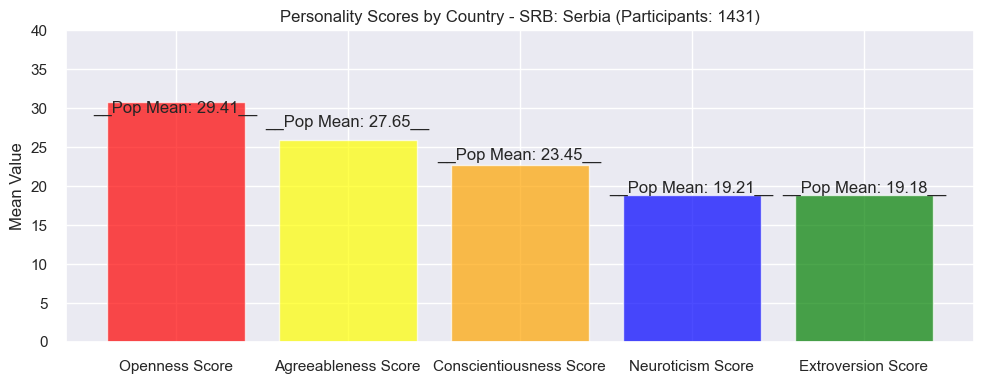

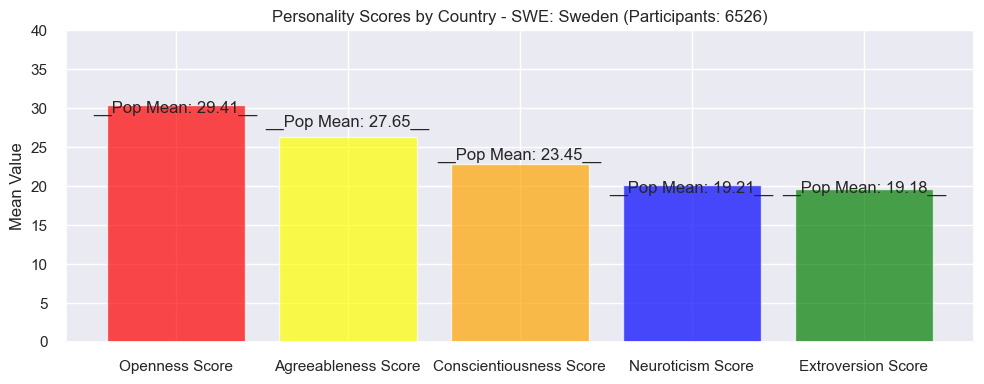

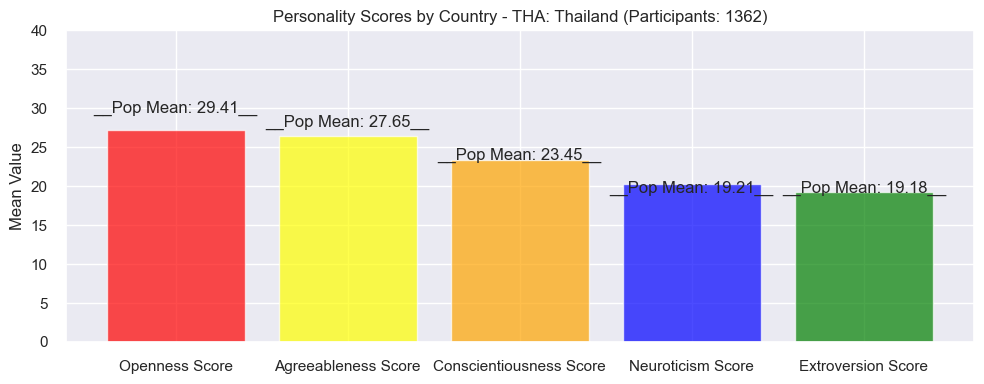

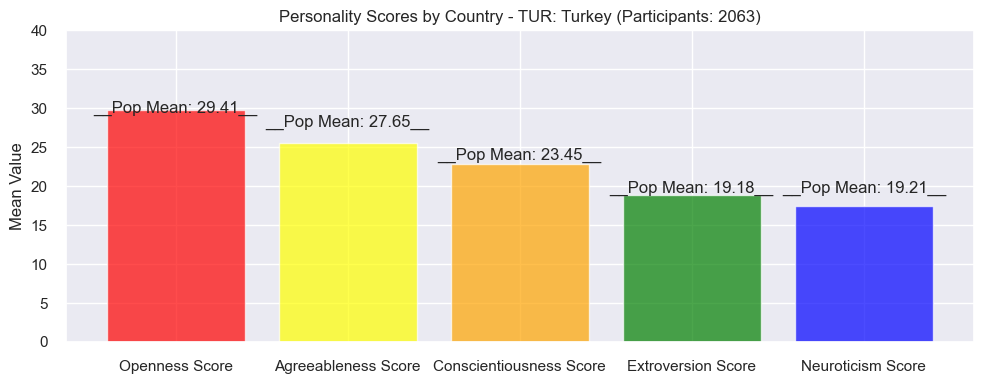

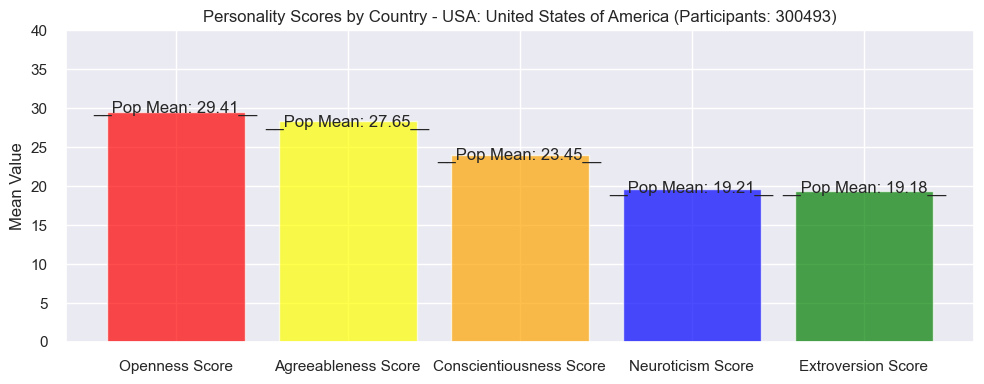

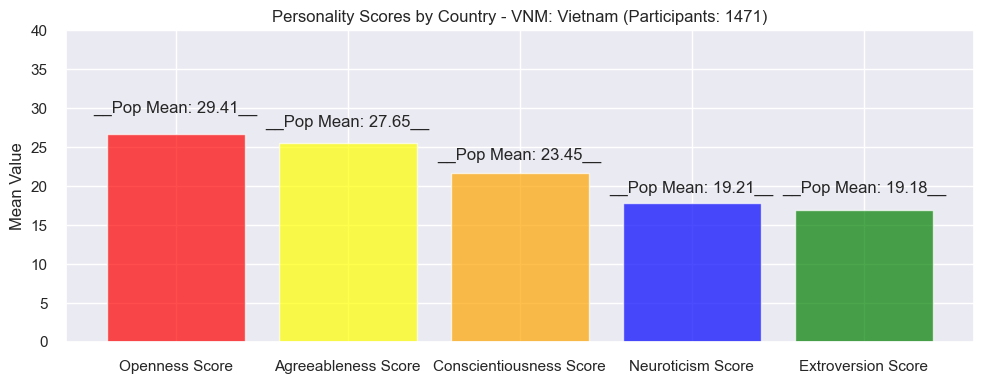

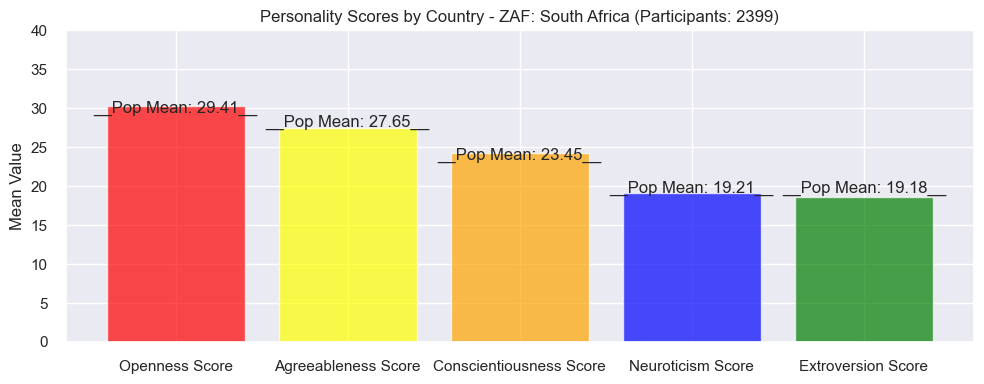

In [96]:
# Calculate the population mean for each personality score
population_average = bigfive_with_clusters[['Openness Score', 'Conscientiousness Score', 
                                            'Extroversion Score', 'Agreeableness Score', 
                                            'Neuroticism Score']].mean()

# Groupby 'Country' and calculating the mean for each personality score
pscores_bycountry = bigfive_with_clusters.groupby('country')[['Openness Score', 'Conscientiousness Score', 
                                                              'Extroversion Score', 'Agreeableness Score', 
                                                              'Neuroticism Score']].mean()


num_countries = len(pscores_bycountry)
num_columns_to_visualize = 5

column_colors = {'Extroversion Score': 'green', 'Agreeableness Score': 'yellow', 
                 'Conscientiousness Score': 'orange', 'Neuroticism Score': 'blue', 
                 'Openness Score': 'red'}

for country, country_data in pscores_bycountry.iterrows():
    plt.figure(figsize=(10, 4))
    columns_to_visualize = country_data.nlargest(num_columns_to_visualize).index.tolist()
    
    country_pop = participants_dict.get(country, 'Population Not Found')
    country_name = country_names_dict.get(country, 'Country Not Found')
    
    # Plotting bar graphs
    for idx, column in enumerate(columns_to_visualize):
        color = column_colors.get(column, 'black')
        bar = plt.bar(column, country_data[column], label=country, alpha=0.7, color=color)
        
        # Adding indication lines for population average, lining up with underscore on annotation
        #plt.axhline(y=population_average[column], color='black', linestyle=' ', linewidth=bar.patches[0].get_width() * 0.1)
        plt.text(idx, population_average[column], f'__Pop Mean: {population_average[column]:.2f}__', ha='center')

    
    plt.title(f'Personality Scores by Country - {country}: {country_name} (Participants: {country_pop})')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.ylim(0, 40)
    plt.tight_layout()
    plt.show()

In [43]:
pscores_bycountry

Openness Score  Conscientiousness Score  Extroversion Score  \
country                                                                
ARE           28.002904                23.750871           19.712544   
ARG           30.166255                21.667078           18.353498   
AUS           28.982773                23.540063           19.483037   
AUT           30.931275                22.436226           19.708212   
BEL           29.972514                21.814470           19.306791   
BRA           30.678834                20.993917           16.051185   
CAN           29.587396                23.564572           19.119858   
CHE           31.168838                22.869164           19.672096   
CHL           29.931459                21.601640           18.579965   
COL           28.850790                21.843072           18.991547   
CZE           29.750550                21.532649           17.950110   
DEU           31.112345                22.064892           18.348417   
DNK           30.157549                22.334828           20.173991   
ESP           30.201667                22.222909           19.578381   
FIN           29.674194                21.536657           17.978006   
FRA           31.001779                21.699133           18.439404   
GBR           29.523899                22.281104           19.191795   
GRC           29.926463                22.472294           18.721906   
HKG           25.918216                23.016935           19.080958   
HRV           30.134510                22.410834           18.863664   
HUN           30.837468                21.772455           18.107784   
IDN           27.231534                22.714692           17.729505   
IND           28.108358                23.476389           19.484310   
IRL           29.832048                22.662668           19.827763   
ISR           31.167286                23.176580           19.787175   
ITA           30.499869                22.576974           18.461054   
JPN           28.683839                22.320395           19.398730   
KOR           28.705882                22.079585           18.835640   
MEX           28.791903                21.931118           19.119154   
MYS           24.893207                22.809795           18.109163   
NLD           29.813314                22.952243           20.693922   
NOR           29.560179                23.588202           20.494465   
NZL           29.083623                23.073540           19.274687   
PAK           26.562406                24.156892           19.793985   
PER           28.646332                21.044015           19.312741   
PHL           26.718585                23.506019           17.641922   
POL           30.905827                21.103839           16.952499   
PRT           29.713039                21.642197           16.863450   
ROU           30.151994                22.325309           18.726272   
RUS           29.034700                21.932571           17.736987   
SGP           26.899040                22.830622           17.858365   
SRB           30.830887                22.716981           18.839972   
SWE           30.421391                22.805547           19.679589   
THA           27.182085                23.381057           19.310573   
TUR           29.808531                22.868638           18.885119   
USA           29.546379                24.062371           19.353423   
VNM           26.671652                21.738953           16.953093   
ZAF           30.267612                24.199667           18.669446   

         Agreeableness Score  Neuroticism Score  
country                                          
ARE                27.886760          18.141115  
ARG                26.446091          17.648560  
AUS                27.902185          19.399248  
AUT                26.757135          20.081538  
BEL                27.333064          19.425627  
BRA                24.714705          18.254668  
CAN     

In [59]:
pscores_bycountry['Openness Score'].sort_values(ascending=False).round(2).head()

country
CHE    31.17
ISR    31.17
DEU    31.11
FRA    31.00
AUT    30.93
Name: Openness Score, dtype: float64

In [68]:
pscores_bycountry['Openness Score'].sort_values(ascending=True).round(2).head()

country
MYS    24.89
HKG    25.92
PAK    26.56
VNM    26.67
PHL    26.72
Name: Openness Score, dtype: float64

In [67]:
pscores_bycountry['Conscientiousness Score'].sort_values(ascending=False).round(2).head()

country
ZAF    24.20
PAK    24.16
USA    24.06
ARE    23.75
NOR    23.59
Name: Conscientiousness Score, dtype: float64

In [66]:
pscores_bycountry['Conscientiousness Score'].sort_values(ascending=True).round(2).head()

country
BRA    20.99
PER    21.04
POL    21.10
CZE    21.53
FIN    21.54
Name: Conscientiousness Score, dtype: float64

In [65]:
pscores_bycountry['Extroversion Score'].sort_values(ascending=False).round(2).head()

country
NLD    20.69
NOR    20.49
DNK    20.17
IRL    19.83
PAK    19.79
Name: Extroversion Score, dtype: float64

In [64]:
pscores_bycountry['Extroversion Score'].sort_values(ascending=True).round(2).head()

country
BRA    16.05
PRT    16.86
POL    16.95
VNM    16.95
PHL    17.64
Name: Extroversion Score, dtype: float64

In [63]:
pscores_bycountry['Agreeableness Score'].sort_values(ascending=False).round(2).head()

country
PAK    28.63
USA    28.34
AUS    27.90
ARE    27.89
CAN    27.74
Name: Agreeableness Score, dtype: float64

In [62]:
pscores_bycountry['Agreeableness Score'].sort_values(ascending=True).round(2).head()

country
POL    23.89
RUS    24.53
BRA    24.71
FIN    25.11
CZE    25.36
Name: Agreeableness Score, dtype: float64

In [61]:
pscores_bycountry['Neuroticism Score'].sort_values(ascending=False).round(2).head()

country
NLD    20.71
CHE    20.50
THA    20.33
SWE    20.13
AUT    20.08
Name: Neuroticism Score, dtype: float64

In [60]:
pscores_bycountry['Neuroticism Score'].sort_values(ascending=True).round(2).head()

country
GRC    16.71
RUS    17.20
POL    17.31
PHL    17.41
TUR    17.42
Name: Neuroticism Score, dtype: float64

In [34]:
print('How many participants per cluster from each country?\r')

bycountry = bigfive_with_clusters.groupby(['country', 'Cluster']).size().sort_values(ascending=False)
bycountry = bycountry.reset_index(name='Count')

country_counts = bycountry.groupby('country')['Count'].sum().reset_index(name='Country_Count')
bycountry = pd.merge(bycountry, country_counts, on='country')
bycountry_sorted = bycountry.sort_values(by='Country_Count', ascending=False)
bycountry_sorted = bycountry_sorted.reset_index(drop=True)
pd.set_option('display.max_rows', None)

print(bycountry_sorted.drop(columns='Country_Count').to_string(index=False))


How many participants per cluster from each country?
country  Cluster  Count
    USA        1  59343
    USA        3  54329
    USA        5  51841
    USA        2  47248
    USA        0  32433
    USA        4  55299
    GBR        1   6579
    GBR        0   5759
    GBR        4   5955
    GBR        5   6712
    GBR        2   8745
    GBR        3   9661
    CAN        3   7155
    CAN        1   6936
    CAN        4   6728
    CAN        5   6452
    CAN        2   6380
    CAN        0   4686
    AUS        2   5135
    AUS        0   3301
    AUS        5   4881
    AUS        4   5471
    AUS        1   5584
    AUS        3   5930
    DEU        3   2164
    DEU        5   1307
    DEU        1   1651
    DEU        4   1847
    DEU        2   2042
    DEU        0   1884
    IND        2   1998
    IND        3   1918
    IND        1   1708
    IND        4   1640
    IND        5   1559
    IND        0   1024
    PHL        1    910
    PHL        0   1081
    PHL    

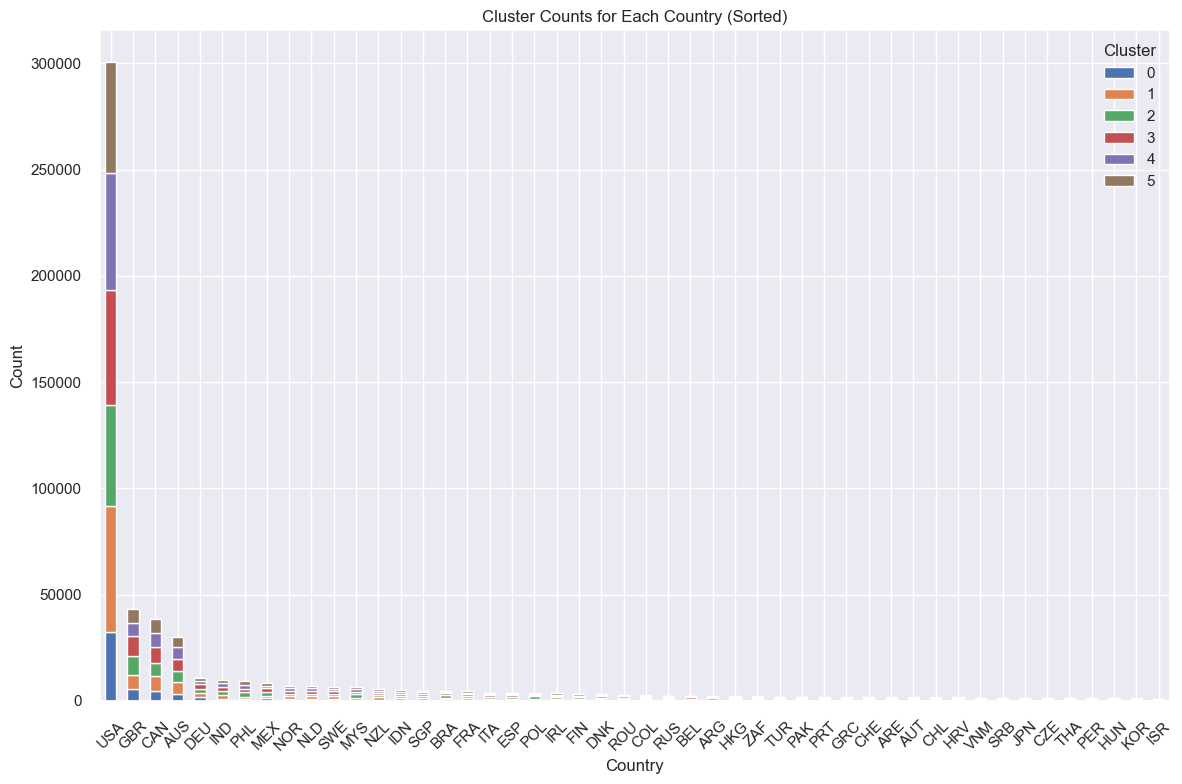

In [35]:
# Grouping by 'Country' and counting occurrences of 'Cluster' values
cluster_counts = bigfive_with_clusters.groupby(['country'])['Cluster'].value_counts().sort_values(ascending=False)

# Unstacking to have 'Cluster' as columns to ease plotting
cluster_counts_unstacked = cluster_counts.unstack()

# Getting the sum of clusters for each country and sorting them
sum_clusters_by_country = cluster_counts_unstacked.sum(axis=1)
sorted_countries = sum_clusters_by_country.sort_values(ascending=False).index
cluster_counts_unstacked_sorted = cluster_counts_unstacked.loc[sorted_countries]

cluster_counts_unstacked_sorted.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Cluster Counts for Each Country (Sorted)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

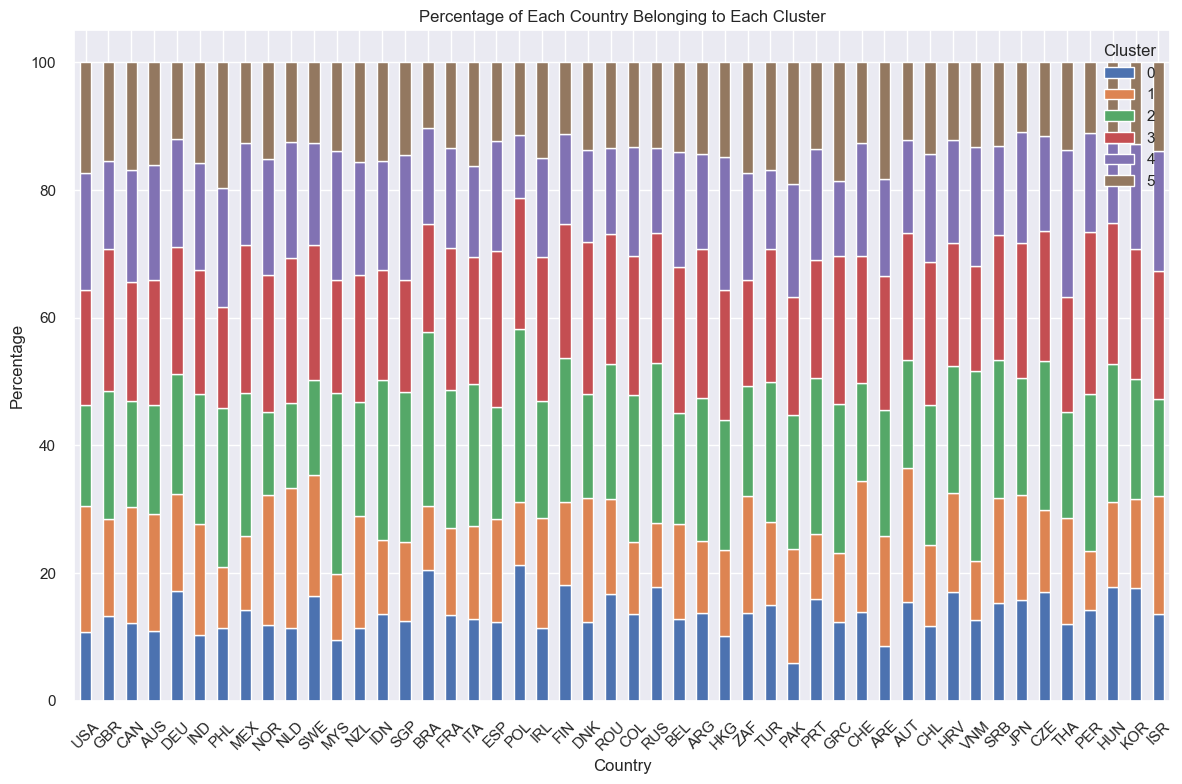

In [36]:
# Calculating percentages for each cluster within each country
cluster_percentages = cluster_counts_unstacked.div(cluster_counts_unstacked.sum(axis=1), axis=0) * 100

# Get the sum of clusters for each country and sort them
sum_clusters_by_country = cluster_counts_unstacked.sum(axis=1)
sorted_countries = sum_clusters_by_country.sort_values(ascending=False).index
cluster_percentages_sorted = cluster_percentages.loc[sorted_countries]

cluster_percentages_sorted.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Percentage of Each Country Belonging to Each Cluster')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()